# Feature Importance

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

Load Previous Trained Model

In [2]:
from tensorflow.keras.models import load_model

model = load_model('../2_Modeling_Phase/Saved-Models/Farm-Flow_DNN-Deep-Neural-Network_Model.h5')

2024-03-07 17:29:01.030743: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-07 17:29:01.032616: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-07 17:29:01.056317: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 17:29:01.056335: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 17:29:01.056964: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Load Train Dataset

In [3]:
df_train = pd.read_csv("../0_Datasets/Farm-Flow/train.csv")

Load Test Dataset

In [4]:
df_test = pd.read_csv("../0_Datasets/Farm-Flow/test.csv")

In [5]:
display(df_train)

,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,...,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,traffic,is_attack
0,-0.236304,-0.662387,-0.577140,-0.443123,-0.277741,-0.268577,-0.273647,-1.394192,-0.643844,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
1,-0.672105,-0.457813,-0.577140,-0.443123,0.490111,0.504662,0.498222,0.728588,-0.643844,0.278456,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.419418,-0.741186,-0.418623,Port_Scanning,1
2,-0.454205,-0.662387,-0.577140,-0.443123,-0.277918,-0.268577,-0.273736,-1.394192,-0.724235,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
3,2.378496,2.406229,2.285759,2.444445,-0.276874,-0.267504,-0.272675,0.728588,2.129645,-0.147053,...,-0.240860,1.678331,-0.105550,-0.268638,2.620142,2.654541,1.265201,2.728235,Normal,0
4,-0.672105,-0.457813,-0.577140,-0.443123,-0.277823,-0.268460,-0.273629,0.728588,-0.684039,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.670339,-0.529202,-0.741186,-0.418623,MQTT_Flood,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47341,-0.454205,-0.457813,-0.577140,-0.443123,-0.276776,-0.267991,-0.272869,-0.332802,-0.483062,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.329944,-0.419418,-0.741186,-0.418623,TCP_Flood,1
47342,-0.454205,-0.662387,-0.577140,-0.443123,-0.277509,-0.268577,-0.273530,-1.394192,-0.724235,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
47343,2.160596,1.997080,2.285759,2.444445,-0.276943,-0.267646,-0.272781,0.576960,1.928668,-0.147053,...,-0.240860,1.678331,-0.054762,-0.267306,0.275202,0.312477,-0.072391,0.630330,Normal,0
47344,1.288996,1.383357,1.713179,0.711904,-0.265775,-0.256330,-0.261520,0.728588,2.330623,1.129475,...,-0.250326,0.400251,-0.238680,-0.346375,1.485493,1.556699,0.470671,0.378581,Normal,0


In [6]:
display(df_test)

,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,...,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,traffic,is_attack
0,-0.672105,-0.457813,-0.577140,-0.443123,-0.276940,-0.267571,-0.272742,0.728588,-0.684039,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.419418,-0.741186,-0.418623,MQTT_Flood,1
1,-0.672105,-0.457813,-0.577140,-0.443123,-0.277181,-0.267813,-0.272983,0.728588,-0.684039,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.419418,-0.741186,-0.418623,MQTT_Flood,1
2,-0.454205,-0.457813,-0.577140,-0.443123,-0.276909,-0.268058,-0.272969,-0.332802,-0.483062,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.329944,-0.419418,-0.741186,-0.418623,TCP_Flood,1
3,2.378496,2.406229,2.285759,2.444445,-0.276907,-0.267537,-0.272708,0.728588,2.129645,-0.147053,...,-0.240860,1.678331,-0.105550,-0.268638,2.620142,2.654541,1.265201,2.728235,Normal,0
4,-0.454205,-0.253238,-0.004560,-0.443123,-0.276892,-0.267522,-0.272693,0.728588,-0.241889,1.129475,...,-0.477522,-0.635539,-0.408378,-0.455263,-0.329944,-0.199849,-0.596727,-0.418623,HTTP_Flood,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15778,1.942696,2.201655,2.285759,2.444445,-0.277003,-0.267561,-0.272768,0.891878,1.727690,-0.147053,...,-0.240860,1.678331,-0.054762,-0.267306,0.691239,0.897993,0.262007,1.154806,Arp_Spoofing,1
15779,2.160596,2.201655,2.285759,2.444445,-0.276991,-0.267622,-0.272793,0.728588,1.928668,-0.147053,...,-0.240860,1.678331,-0.072901,-0.267431,2.393212,2.434972,1.265201,2.728235,Normal,0
15780,-0.236304,-0.662387,-0.577140,-0.443123,-0.277906,-0.268577,-0.273730,-1.394192,-0.643844,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
15781,-0.454205,-0.662387,-0.577140,-0.443123,-0.277687,-0.268577,-0.273620,-1.394192,-0.724235,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1


-----
## Train and Test Datasets

Drop Multiclass Column

In [7]:
df_train = df_train.drop('traffic', axis=1)
df_test = df_test.drop('traffic', axis=1)

Excluding the target variable

In [8]:
X_columns = df_train.columns.drop('is_attack')

Create a feature matrix X by selecting only the columns specified in X_columns. Then convert the selected data into a NumPy array.

In [9]:
X = df_train[X_columns].values

Creates a target variable y containing the target variable

In [10]:
y = df_train["is_attack"].values

Split into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Get Features Names and Class Names

In [12]:
feature_names = list(X_columns)
class_names = ["Normal", "Malicious"]
response_dict = {0: 'Normal', 1: 'Malicious'}

Generate Prediction

In [13]:
pred = model.predict(X_test)

370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step


Labeled Df's

In [14]:
X_test_labeled = pd.DataFrame(X_test, columns=feature_names)
X_train_labeled = pd.DataFrame(X_train, columns=feature_names)

# Since both are one-dimensional NumPy arrays
pred_series = pd.Series(pred.flatten())
y_test_target_series = pd.Series(y_test)
y_train_target_series = pd.Series(y_train)

Create a subset of the Train DF for faster training

In [15]:
subset_percentage = 0.1
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, test_size=1 - subset_percentage, stratify=y_train)

In [16]:
subset_percentage = 0.1
X_subset_labeled, _, y_subset_labeled, _ = train_test_split(X_train_labeled, y_train_target_series, test_size=1 - subset_percentage, stratify=y_train_target_series)

Row to explain

In [17]:
idx = 0

---

## Neural Network

In [18]:
weights = model.get_weights()

# Extract the first layer weights
input_layer_weights = weights[0]

feature_importance = np.mean(np.abs(input_layer_weights), axis=1)
df_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

df_feature_importance

,Feature,Importance
0,fwd_data_pkts_tot,0.198020
1,fwd_pkts_per_sec,0.197364
2,bwd_pkts_per_sec,0.194316
3,flow_pkts_per_sec,0.194145
4,bwd_header_size_min,0.184630
5,bwd_subflow_bytes,0.183655
6,fwd_header_size_tot,0.169897
7,fwd_subflow_pkts,0.169504
8,bwd_pkts_payload.std,0.166886
9,fwd_header_size_max,0.166541


## Imodels

In [19]:
import imodels
from imodels import FIGSClassifier

#model_figs = FIGSClassifier(max_rules=7, max_trees=3)
#model_figs.fit(X_test_labeled, y_test_target_series, feature_names=feature_names)

dfp_importance = pd.DataFrame({'feat_names': feature_names})
dfp_importance['feature'] = dfp_importance.index
dfp_importance_gini = pd.DataFrame({'importance_gini': feature_importance})
dfp_importance_gini['feature'] = dfp_importance_gini.index
dfp_importance_gini['importance_gini_pct'] = dfp_importance_gini['importance_gini'].rank(pct=True)
dfp_importance = pd.merge(dfp_importance, dfp_importance_gini, on='feature', how='left')
dfp_importance = dfp_importance.sort_values(by=['importance_gini', 'feature'], ascending=[False, True]).reset_index(drop=True)
display(dfp_importance)

,feat_names,feature,importance_gini,importance_gini_pct
0,fwd_data_pkts_tot,2,0.198020,1.000000
1,fwd_pkts_per_sec,4,0.197364,0.969697
2,bwd_pkts_per_sec,5,0.194316,0.939394
3,flow_pkts_per_sec,6,0.194145,0.909091
4,bwd_header_size_min,12,0.184630,0.878788
5,bwd_subflow_bytes,32,0.183655,0.848485
6,fwd_header_size_tot,8,0.169897,0.818182
7,fwd_subflow_pkts,29,0.169504,0.787879
8,bwd_pkts_payload.std,23,0.166886,0.757576
9,fwd_header_size_max,10,0.166541,0.727273


## Shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
shap_values() is deprecated; use __call__().
PermutationExplainer explainer: 11838it [07:57, 24.32it/s]                                                                                                        


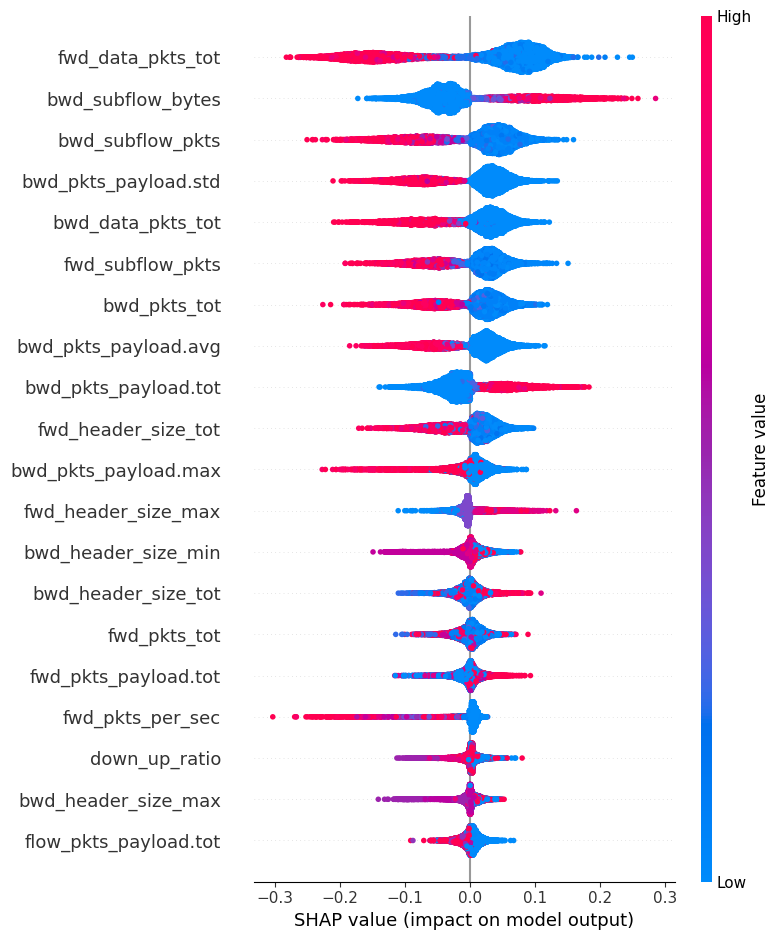

In [20]:
import shap

masker = shap.maskers.Independent(X_subset)

explainer = shap.Explainer(model, masker=masker)
#explainer = shap.KernelExplainer(model, data=X_subset)
#explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test_labeled)

shap.summary_plot(shap_values, X_test_labeled,feature_names=feature_names,class_names=class_names)

## Shapash

In [ ]:
from shapash import SmartExplainer

pred_series_shapash = pred_series.iloc[:len(X_test_labeled)]
#pred_series_shapash.index = X_test_subset_labeled.index

xpl = SmartExplainer(model=model)
xpl.compile(x=X_test_labeled,
            y_pred=pred_series,
            y_target=y_test_target_series)

xpl.plot.features_importance()

INFO: Shap explainer type - shap.explainers.PermutationExplainer()
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
/home/ivoafonsobispo/.local/lib/python3.10/site-packages/shapash/utils/model.py:105: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
107/107 ━━━━━━━

PermutationExplainer explainer:   0%|                                                                                                  | 13/11837 [00:00<?, ?it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


PermutationExplainer explainer:   0%|                                                                                        | 15/11837 [00:11<1:27:56,  2.24it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


PermutationExplainer explainer:   0%|                                                                                        | 16/11837 [00:12<2:09:49,  1.52it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


PermutationExplainer explainer:   0%|▏                                                                                       | 17/11837 [00:13<2:26:08,  1.35it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


PermutationExplainer explainer:   0%|▏                                                                                       | 18/11837 [00:13<2:22:55,  1.38it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step


PermutationExplainer explainer:   0%|▏                                                                                       | 19/11837 [00:14<2:18:37,  1.42it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


PermutationExplainer explainer:   0%|▏                                                                                       | 20/11837 [00:15<2:16:09,  1.45it/s]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step


PermutationExplainer explainer:   0%|▏                                                                                       | 21/11837 [00:15<2:16:11,  1.45it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   0%|▏                                                                                       | 22/11837 [00:16<2:23:47,  1.37it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   0%|▏                                                                                       | 23/11837 [00:17<2:31:58,  1.30it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:   0%|▏                                                                                       | 24/11837 [00:18<2:26:55,  1.34it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:   0%|▏                                                                                       | 25/11837 [00:18<2:21:17,  1.39it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step


PermutationExplainer explainer:   0%|▏                                                                                       | 26/11837 [00:19<2:28:30,  1.33it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


PermutationExplainer explainer:   0%|▏                                                                                       | 27/11837 [00:20<2:24:26,  1.36it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   0%|▏                                                                                       | 28/11837 [00:21<2:37:37,  1.25it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   0%|▏                                                                                       | 29/11837 [00:22<2:44:20,  1.20it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   0%|▏                                                                                       | 30/11837 [00:22<2:34:24,  1.27it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step


PermutationExplainer explainer:   0%|▏                                                                                       | 31/11837 [00:23<2:40:06,  1.23it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


PermutationExplainer explainer:   0%|▏                                                                                       | 32/11837 [00:24<2:31:06,  1.30it/s]

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   0%|▏                                                                                       | 33/11837 [00:25<2:43:35,  1.20it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   0%|▎                                                                                       | 34/11837 [00:26<2:46:29,  1.18it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step


PermutationExplainer explainer:   0%|▎                                                                                       | 35/11837 [00:27<2:48:03,  1.17it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   0%|▎                                                                                       | 36/11837 [00:28<2:47:50,  1.17it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   0%|▎                                                                                       | 37/11837 [00:28<2:38:28,  1.24it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   0%|▎                                                                                       | 38/11837 [00:29<2:30:39,  1.31it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


PermutationExplainer explainer:   0%|▎                                                                                       | 39/11837 [00:30<2:36:12,  1.26it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step


PermutationExplainer explainer:   0%|▎                                                                                       | 40/11837 [00:31<2:44:30,  1.20it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   0%|▎                                                                                       | 41/11837 [00:32<2:45:42,  1.19it/s]

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step


PermutationExplainer explainer:   0%|▎                                                                                       | 42/11837 [00:32<2:35:36,  1.26it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:   0%|▎                                                                                       | 43/11837 [00:33<2:26:40,  1.34it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


PermutationExplainer explainer:   0%|▎                                                                                       | 44/11837 [00:34<2:20:21,  1.40it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   0%|▎                                                                                       | 45/11837 [00:34<2:15:58,  1.45it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


PermutationExplainer explainer:   0%|▎                                                                                       | 46/11837 [00:35<2:23:08,  1.37it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


PermutationExplainer explainer:   0%|▎                                                                                       | 47/11837 [00:36<2:19:40,  1.41it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


PermutationExplainer explainer:   0%|▎                                                                                       | 48/11837 [00:36<2:15:57,  1.45it/s]

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


PermutationExplainer explainer:   0%|▎                                                                                       | 49/11837 [00:37<2:16:34,  1.44it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step


PermutationExplainer explainer:   0%|▎                                                                                       | 50/11837 [00:38<2:30:29,  1.31it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   0%|▍                                                                                       | 51/11837 [00:39<2:36:39,  1.25it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


PermutationExplainer explainer:   0%|▍                                                                                       | 52/11837 [00:40<2:44:53,  1.19it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


PermutationExplainer explainer:   0%|▍                                                                                       | 53/11837 [00:41<2:46:12,  1.18it/s]

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step


PermutationExplainer explainer:   0%|▍                                                                                       | 54/11837 [00:42<2:46:19,  1.18it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


PermutationExplainer explainer:   0%|▍                                                                                       | 55/11837 [00:42<2:46:52,  1.18it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step


PermutationExplainer explainer:   0%|▍                                                                                       | 56/11837 [00:43<2:34:45,  1.27it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   0%|▍                                                                                       | 57/11837 [00:44<2:38:24,  1.24it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step


PermutationExplainer explainer:   0%|▍                                                                                       | 58/11837 [00:45<2:29:14,  1.32it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   0%|▍                                                                                       | 59/11837 [00:45<2:34:40,  1.27it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   1%|▍                                                                                       | 60/11837 [00:46<2:25:47,  1.35it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   1%|▍                                                                                       | 61/11837 [00:47<2:20:14,  1.40it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   1%|▍                                                                                       | 62/11837 [00:47<2:15:52,  1.44it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


PermutationExplainer explainer:   1%|▍                                                                                       | 63/11837 [00:48<2:12:51,  1.48it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   1%|▍                                                                                       | 64/11837 [00:49<2:12:13,  1.48it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   1%|▍                                                                                       | 65/11837 [00:49<2:12:10,  1.48it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


PermutationExplainer explainer:   1%|▍                                                                                       | 66/11837 [00:50<2:12:06,  1.49it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   1%|▍                                                                                       | 67/11837 [00:51<2:10:12,  1.51it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step


PermutationExplainer explainer:   1%|▌                                                                                       | 68/11837 [00:51<2:08:15,  1.53it/s]

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step


PermutationExplainer explainer:   1%|▌                                                                                       | 69/11837 [00:52<2:24:13,  1.36it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   1%|▌                                                                                       | 70/11837 [00:53<2:19:21,  1.41it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step


PermutationExplainer explainer:   1%|▌                                                                                       | 71/11837 [00:54<2:27:15,  1.33it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   1%|▌                                                                                       | 72/11837 [00:54<2:33:20,  1.28it/s]

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


PermutationExplainer explainer:   1%|▌                                                                                       | 73/11837 [00:55<2:41:00,  1.22it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   1%|▌                                                                                       | 74/11837 [00:56<2:32:07,  1.29it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step


PermutationExplainer explainer:   1%|▌                                                                                       | 75/11837 [00:57<2:35:06,  1.26it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


PermutationExplainer explainer:   1%|▌                                                                                       | 76/11837 [00:58<2:26:28,  1.34it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   1%|▌                                                                                       | 77/11837 [00:58<2:32:08,  1.29it/s]

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


PermutationExplainer explainer:   1%|▌                                                                                       | 78/11837 [00:59<2:24:59,  1.35it/s]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step


PermutationExplainer explainer:   1%|▌                                                                                       | 79/11837 [01:00<2:30:47,  1.30it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


PermutationExplainer explainer:   1%|▌                                                                                       | 80/11837 [01:01<2:34:23,  1.27it/s]

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step


PermutationExplainer explainer:   1%|▌                                                                                       | 81/11837 [01:02<2:36:42,  1.25it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   1%|▌                                                                                       | 82/11837 [01:02<2:40:11,  1.22it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step


PermutationExplainer explainer:   1%|▌                                                                                       | 83/11837 [01:03<2:31:41,  1.29it/s]

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   1%|▌                                                                                       | 84/11837 [01:04<2:33:55,  1.27it/s]

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


PermutationExplainer explainer:   1%|▋                                                                                       | 85/11837 [01:05<2:39:42,  1.23it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   1%|▋                                                                                       | 86/11837 [01:05<2:28:45,  1.32it/s]

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step


PermutationExplainer explainer:   1%|▋                                                                                       | 87/11837 [01:06<2:25:09,  1.35it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


PermutationExplainer explainer:   1%|▋                                                                                       | 88/11837 [01:07<2:30:02,  1.31it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step


PermutationExplainer explainer:   1%|▋                                                                                       | 89/11837 [01:08<2:38:42,  1.23it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step


PermutationExplainer explainer:   1%|▋                                                                                       | 90/11837 [01:08<2:28:57,  1.31it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   1%|▋                                                                                       | 91/11837 [01:09<2:22:36,  1.37it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


PermutationExplainer explainer:   1%|▋                                                                                       | 92/11837 [01:10<2:17:52,  1.42it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   1%|▋                                                                                       | 93/11837 [01:10<2:14:26,  1.46it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   1%|▋                                                                                       | 94/11837 [01:11<2:14:01,  1.46it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


PermutationExplainer explainer:   1%|▋                                                                                       | 95/11837 [01:12<2:28:07,  1.32it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   1%|▋                                                                                       | 96/11837 [01:13<2:35:01,  1.26it/s]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   1%|▋                                                                                       | 97/11837 [01:14<2:38:23,  1.24it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


PermutationExplainer explainer:   1%|▋                                                                                       | 98/11837 [01:15<2:40:10,  1.22it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


PermutationExplainer explainer:   1%|▋                                                                                       | 99/11837 [01:15<2:29:14,  1.31it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   1%|▋                                                                                      | 100/11837 [01:16<2:22:12,  1.38it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   1%|▋                                                                                      | 101/11837 [01:17<2:17:20,  1.42it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


PermutationExplainer explainer:   1%|▋                                                                                      | 102/11837 [01:17<2:14:22,  1.46it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step


PermutationExplainer explainer:   1%|▊                                                                                      | 103/11837 [01:18<2:23:23,  1.36it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step


PermutationExplainer explainer:   1%|▊                                                                                      | 104/11837 [01:19<2:18:47,  1.41it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step


PermutationExplainer explainer:   1%|▊                                                                                      | 105/11837 [01:19<2:24:30,  1.35it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step


PermutationExplainer explainer:   1%|▊                                                                                      | 106/11837 [01:20<2:30:08,  1.30it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:   1%|▊                                                                                      | 107/11837 [01:21<2:23:40,  1.36it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   1%|▊                                                                                      | 108/11837 [01:22<2:20:43,  1.39it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


PermutationExplainer explainer:   1%|▊                                                                                      | 109/11837 [01:23<2:33:34,  1.27it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


PermutationExplainer explainer:   1%|▊                                                                                      | 110/11837 [01:23<2:35:07,  1.26it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   1%|▊                                                                                      | 111/11837 [01:24<2:28:06,  1.32it/s]

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   1%|▊                                                                                      | 112/11837 [01:25<2:32:10,  1.28it/s]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step


PermutationExplainer explainer:   1%|▊                                                                                      | 113/11837 [01:26<2:26:27,  1.33it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   1%|▊                                                                                      | 114/11837 [01:26<2:20:53,  1.39it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:   1%|▊                                                                                      | 115/11837 [01:27<2:25:47,  1.34it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   1%|▊                                                                                      | 116/11837 [01:28<2:37:08,  1.24it/s]

171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   1%|▊                                                                                      | 117/11837 [01:29<2:50:25,  1.15it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


PermutationExplainer explainer:   1%|▊                                                                                      | 118/11837 [01:30<2:38:13,  1.23it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   1%|▊                                                                                      | 119/11837 [01:30<2:29:51,  1.30it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step


PermutationExplainer explainer:   1%|▉                                                                                      | 120/11837 [01:31<2:36:57,  1.24it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


PermutationExplainer explainer:   1%|▉                                                                                      | 121/11837 [01:32<2:40:04,  1.22it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   1%|▉                                                                                      | 122/11837 [01:33<2:42:30,  1.20it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step


PermutationExplainer explainer:   1%|▉                                                                                      | 123/11837 [01:34<2:43:58,  1.19it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step


PermutationExplainer explainer:   1%|▉                                                                                      | 124/11837 [01:35<2:46:46,  1.17it/s]

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   1%|▉                                                                                      | 125/11837 [01:36<2:49:28,  1.15it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   1%|▉                                                                                      | 126/11837 [01:36<2:38:36,  1.23it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   1%|▉                                                                                      | 127/11837 [01:37<2:31:01,  1.29it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   1%|▉                                                                                      | 128/11837 [01:38<2:40:52,  1.21it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


PermutationExplainer explainer:   1%|▉                                                                                      | 129/11837 [01:39<2:42:05,  1.20it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   1%|▉                                                                                      | 130/11837 [01:39<2:31:54,  1.28it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


PermutationExplainer explainer:   1%|▉                                                                                      | 131/11837 [01:40<2:25:50,  1.34it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


PermutationExplainer explainer:   1%|▉                                                                                      | 132/11837 [01:41<2:21:41,  1.38it/s]

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   1%|▉                                                                                      | 133/11837 [01:41<2:20:02,  1.39it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


PermutationExplainer explainer:   1%|▉                                                                                      | 134/11837 [01:42<2:17:29,  1.42it/s]

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


PermutationExplainer explainer:   1%|▉                                                                                      | 135/11837 [01:43<2:25:04,  1.34it/s]

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   1%|▉                                                                                      | 136/11837 [01:44<2:30:57,  1.29it/s]

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


PermutationExplainer explainer:   1%|█                                                                                      | 137/11837 [01:45<2:39:44,  1.22it/s]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step


PermutationExplainer explainer:   1%|█                                                                                      | 138/11837 [01:46<2:41:27,  1.21it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:   1%|█                                                                                      | 139/11837 [01:46<2:43:02,  1.20it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


PermutationExplainer explainer:   1%|█                                                                                      | 140/11837 [01:47<2:43:34,  1.19it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   1%|█                                                                                      | 141/11837 [01:48<2:33:23,  1.27it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   1%|█                                                                                      | 142/11837 [01:49<2:25:14,  1.34it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   1%|█                                                                                      | 143/11837 [01:49<2:19:19,  1.40it/s]

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   1%|█                                                                                      | 144/11837 [01:50<2:29:49,  1.30it/s]

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   1%|█                                                                                      | 145/11837 [01:51<2:33:29,  1.27it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step


PermutationExplainer explainer:   1%|█                                                                                      | 146/11837 [01:52<2:25:32,  1.34it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step


PermutationExplainer explainer:   1%|█                                                                                      | 147/11837 [01:52<2:20:51,  1.38it/s]

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   1%|█                                                                                      | 148/11837 [01:53<2:30:14,  1.30it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   1%|█                                                                                      | 149/11837 [01:54<2:23:07,  1.36it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


PermutationExplainer explainer:   1%|█                                                                                      | 150/11837 [01:55<2:30:33,  1.29it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   1%|█                                                                                      | 151/11837 [01:55<2:24:27,  1.35it/s]

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   1%|█                                                                                      | 152/11837 [01:56<2:21:24,  1.38it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   1%|█                                                                                      | 153/11837 [01:57<2:16:51,  1.42it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   1%|█▏                                                                                     | 154/11837 [01:57<2:13:52,  1.45it/s]

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step


PermutationExplainer explainer:   1%|█▏                                                                                     | 155/11837 [01:58<2:13:17,  1.46it/s]

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   1%|█▏                                                                                     | 156/11837 [01:59<2:25:42,  1.34it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   1%|█▏                                                                                     | 157/11837 [02:00<2:20:05,  1.39it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


PermutationExplainer explainer:   1%|█▏                                                                                     | 158/11837 [02:00<2:15:27,  1.44it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step


PermutationExplainer explainer:   1%|█▏                                                                                     | 159/11837 [02:01<2:12:51,  1.47it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   1%|█▏                                                                                     | 160/11837 [02:02<2:10:33,  1.49it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   1%|█▏                                                                                     | 161/11837 [02:02<2:19:39,  1.39it/s]

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step


PermutationExplainer explainer:   1%|█▏                                                                                     | 162/11837 [02:03<2:26:59,  1.32it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   1%|█▏                                                                                     | 163/11837 [02:04<2:20:52,  1.38it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step


PermutationExplainer explainer:   1%|█▏                                                                                     | 164/11837 [02:05<2:28:47,  1.31it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   1%|█▏                                                                                     | 165/11837 [02:05<2:23:48,  1.35it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   1%|█▏                                                                                     | 166/11837 [02:06<2:31:52,  1.28it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step


PermutationExplainer explainer:   1%|█▏                                                                                     | 167/11837 [02:07<2:24:36,  1.35it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   1%|█▏                                                                                     | 168/11837 [02:08<2:30:49,  1.29it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


PermutationExplainer explainer:   1%|█▏                                                                                     | 169/11837 [02:08<2:23:30,  1.36it/s]

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   1%|█▏                                                                                     | 170/11837 [02:09<2:33:53,  1.26it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step


PermutationExplainer explainer:   1%|█▎                                                                                     | 171/11837 [02:10<2:36:03,  1.25it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


PermutationExplainer explainer:   1%|█▎                                                                                     | 172/11837 [02:11<2:44:13,  1.18it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step


PermutationExplainer explainer:   1%|█▎                                                                                     | 173/11837 [02:12<2:45:54,  1.17it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   1%|█▎                                                                                     | 174/11837 [02:13<2:35:21,  1.25it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step


PermutationExplainer explainer:   1%|█▎                                                                                     | 175/11837 [02:13<2:26:26,  1.33it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


PermutationExplainer explainer:   1%|█▎                                                                                     | 176/11837 [02:14<2:33:33,  1.27it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step


PermutationExplainer explainer:   1%|█▎                                                                                     | 177/11837 [02:15<2:26:38,  1.33it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   2%|█▎                                                                                     | 178/11837 [02:16<2:32:37,  1.27it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


PermutationExplainer explainer:   2%|█▎                                                                                     | 179/11837 [02:16<2:25:20,  1.34it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


PermutationExplainer explainer:   2%|█▎                                                                                     | 180/11837 [02:17<2:19:56,  1.39it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   2%|█▎                                                                                     | 181/11837 [02:18<2:15:14,  1.44it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step


PermutationExplainer explainer:   2%|█▎                                                                                     | 182/11837 [02:18<2:21:40,  1.37it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   2%|█▎                                                                                     | 183/11837 [02:19<2:26:54,  1.32it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   2%|█▎                                                                                     | 184/11837 [02:20<2:32:10,  1.28it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   2%|█▎                                                                                     | 185/11837 [02:21<2:25:22,  1.34it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   2%|█▎                                                                                     | 186/11837 [02:22<2:32:10,  1.28it/s]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


PermutationExplainer explainer:   2%|█▎                                                                                     | 187/11837 [02:22<2:26:32,  1.32it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step


PermutationExplainer explainer:   2%|█▍                                                                                     | 188/11837 [02:23<2:32:16,  1.27it/s]

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step


PermutationExplainer explainer:   2%|█▍                                                                                     | 189/11837 [02:24<2:33:56,  1.26it/s]

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   2%|█▍                                                                                     | 190/11837 [02:25<2:39:52,  1.21it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   2%|█▍                                                                                     | 191/11837 [02:26<2:41:26,  1.20it/s]

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step


PermutationExplainer explainer:   2%|█▍                                                                                     | 192/11837 [02:27<2:44:34,  1.18it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   2%|█▍                                                                                     | 193/11837 [02:27<2:33:18,  1.27it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   2%|█▍                                                                                     | 194/11837 [02:28<2:26:21,  1.33it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   2%|█▍                                                                                     | 195/11837 [02:29<2:35:15,  1.25it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   2%|█▍                                                                                     | 196/11837 [02:30<2:39:38,  1.22it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step


PermutationExplainer explainer:   2%|█▍                                                                                     | 197/11837 [02:31<2:42:20,  1.19it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step


PermutationExplainer explainer:   2%|█▍                                                                                     | 198/11837 [02:31<2:31:35,  1.28it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:   2%|█▍                                                                                     | 199/11837 [02:32<2:36:16,  1.24it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


PermutationExplainer explainer:   2%|█▍                                                                                     | 200/11837 [02:33<2:27:29,  1.32it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   2%|█▍                                                                                     | 201/11837 [02:33<2:21:01,  1.38it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step


PermutationExplainer explainer:   2%|█▍                                                                                     | 202/11837 [02:34<2:18:33,  1.40it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   2%|█▍                                                                                     | 203/11837 [02:35<2:26:42,  1.32it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


PermutationExplainer explainer:   2%|█▍                                                                                     | 204/11837 [02:36<2:22:14,  1.36it/s]

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   2%|█▌                                                                                     | 205/11837 [02:37<2:29:22,  1.30it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


PermutationExplainer explainer:   2%|█▌                                                                                     | 206/11837 [02:37<2:24:45,  1.34it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   2%|█▌                                                                                     | 207/11837 [02:38<2:18:26,  1.40it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step


PermutationExplainer explainer:   2%|█▌                                                                                     | 208/11837 [02:39<2:24:17,  1.34it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step


PermutationExplainer explainer:   2%|█▌                                                                                     | 209/11837 [02:39<2:19:17,  1.39it/s]

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


PermutationExplainer explainer:   2%|█▌                                                                                     | 210/11837 [02:40<2:28:51,  1.30it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   2%|█▌                                                                                     | 211/11837 [02:41<2:34:10,  1.26it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step


PermutationExplainer explainer:   2%|█▌                                                                                     | 212/11837 [02:42<2:27:05,  1.32it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step


PermutationExplainer explainer:   2%|█▌                                                                                     | 213/11837 [02:42<2:21:09,  1.37it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   2%|█▌                                                                                     | 214/11837 [02:43<2:17:30,  1.41it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


PermutationExplainer explainer:   2%|█▌                                                                                     | 215/11837 [02:44<2:13:22,  1.45it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   2%|█▌                                                                                     | 216/11837 [02:45<2:28:10,  1.31it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


PermutationExplainer explainer:   2%|█▌                                                                                     | 217/11837 [02:45<2:21:35,  1.37it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   2%|█▌                                                                                     | 218/11837 [02:46<2:28:46,  1.30it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   2%|█▌                                                                                     | 219/11837 [02:47<2:33:47,  1.26it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step


PermutationExplainer explainer:   2%|█▌                                                                                     | 220/11837 [02:48<2:37:16,  1.23it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step


PermutationExplainer explainer:   2%|█▌                                                                                     | 221/11837 [02:49<2:47:24,  1.16it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   2%|█▋                                                                                     | 222/11837 [02:50<2:48:57,  1.15it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   2%|█▋                                                                                     | 223/11837 [02:50<2:37:33,  1.23it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   2%|█▋                                                                                     | 224/11837 [02:51<2:36:42,  1.24it/s]

171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


PermutationExplainer explainer:   2%|█▋                                                                                     | 225/11837 [02:52<2:40:52,  1.20it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   2%|█▋                                                                                     | 226/11837 [02:53<2:30:13,  1.29it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


PermutationExplainer explainer:   2%|█▋                                                                                     | 227/11837 [02:54<2:34:20,  1.25it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   2%|█▋                                                                                     | 228/11837 [02:54<2:27:19,  1.31it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


PermutationExplainer explainer:   2%|█▋                                                                                     | 229/11837 [02:55<2:22:32,  1.36it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


PermutationExplainer explainer:   2%|█▋                                                                                     | 230/11837 [02:56<2:26:18,  1.32it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


PermutationExplainer explainer:   2%|█▋                                                                                     | 231/11837 [02:56<2:20:11,  1.38it/s]

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


PermutationExplainer explainer:   2%|█▋                                                                                     | 232/11837 [02:57<2:30:20,  1.29it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   2%|█▋                                                                                     | 233/11837 [02:58<2:35:34,  1.24it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   2%|█▋                                                                                     | 234/11837 [02:59<2:38:46,  1.22it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step


PermutationExplainer explainer:   2%|█▋                                                                                     | 235/11837 [03:00<2:29:51,  1.29it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step


PermutationExplainer explainer:   2%|█▋                                                                                     | 236/11837 [03:01<2:31:55,  1.27it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   2%|█▋                                                                                     | 237/11837 [03:01<2:24:14,  1.34it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


PermutationExplainer explainer:   2%|█▋                                                                                     | 238/11837 [03:02<2:19:31,  1.39it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


PermutationExplainer explainer:   2%|█▊                                                                                     | 239/11837 [03:02<2:16:24,  1.42it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


PermutationExplainer explainer:   2%|█▊                                                                                     | 240/11837 [03:03<2:24:38,  1.34it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   2%|█▊                                                                                     | 241/11837 [03:04<2:32:31,  1.27it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   2%|█▊                                                                                     | 242/11837 [03:05<2:40:59,  1.20it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


PermutationExplainer explainer:   2%|█▊                                                                                     | 243/11837 [03:06<2:41:34,  1.20it/s]

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   2%|█▊                                                                                     | 244/11837 [03:07<2:47:30,  1.15it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step


PermutationExplainer explainer:   2%|█▊                                                                                     | 245/11837 [03:08<2:44:28,  1.17it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


PermutationExplainer explainer:   2%|█▊                                                                                     | 246/11837 [03:08<2:34:19,  1.25it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   2%|█▊                                                                                     | 247/11837 [03:09<2:25:20,  1.33it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step


PermutationExplainer explainer:   2%|█▊                                                                                     | 248/11837 [03:10<2:18:17,  1.40it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


PermutationExplainer explainer:   2%|█▊                                                                                     | 249/11837 [03:10<2:14:01,  1.44it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   2%|█▊                                                                                     | 250/11837 [03:11<2:21:30,  1.36it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   2%|█▊                                                                                     | 251/11837 [03:12<2:27:56,  1.31it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


PermutationExplainer explainer:   2%|█▊                                                                                     | 252/11837 [03:13<2:22:52,  1.35it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step


PermutationExplainer explainer:   2%|█▊                                                                                     | 253/11837 [03:13<2:20:43,  1.37it/s]

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   2%|█▊                                                                                     | 254/11837 [03:14<2:29:50,  1.29it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   2%|█▊                                                                                     | 255/11837 [03:15<2:35:10,  1.24it/s]

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step


PermutationExplainer explainer:   2%|█▉                                                                                     | 256/11837 [03:16<2:43:08,  1.18it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


PermutationExplainer explainer:   2%|█▉                                                                                     | 257/11837 [03:17<2:33:17,  1.26it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step


PermutationExplainer explainer:   2%|█▉                                                                                     | 258/11837 [03:17<2:25:24,  1.33it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step


PermutationExplainer explainer:   2%|█▉                                                                                     | 259/11837 [03:18<2:30:34,  1.28it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step


PermutationExplainer explainer:   2%|█▉                                                                                     | 260/11837 [03:19<2:22:48,  1.35it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   2%|█▉                                                                                     | 261/11837 [03:20<2:18:22,  1.39it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   2%|█▉                                                                                     | 262/11837 [03:20<2:14:11,  1.44it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


PermutationExplainer explainer:   2%|█▉                                                                                     | 263/11837 [03:21<2:12:28,  1.46it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step


PermutationExplainer explainer:   2%|█▉                                                                                     | 264/11837 [03:22<2:20:51,  1.37it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step


PermutationExplainer explainer:   2%|█▉                                                                                     | 265/11837 [03:22<2:16:09,  1.42it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   2%|█▉                                                                                     | 266/11837 [03:23<2:14:04,  1.44it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step


PermutationExplainer explainer:   2%|█▉                                                                                     | 267/11837 [03:24<2:10:44,  1.47it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:   2%|█▉                                                                                     | 268/11837 [03:24<2:11:12,  1.47it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step


PermutationExplainer explainer:   2%|█▉                                                                                     | 269/11837 [03:25<2:25:07,  1.33it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step


PermutationExplainer explainer:   2%|█▉                                                                                     | 270/11837 [03:26<2:19:10,  1.39it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   2%|█▉                                                                                     | 271/11837 [03:27<2:14:45,  1.43it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   2%|█▉                                                                                     | 272/11837 [03:27<2:24:57,  1.33it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step


PermutationExplainer explainer:   2%|██                                                                                     | 273/11837 [03:28<2:19:37,  1.38it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


PermutationExplainer explainer:   2%|██                                                                                     | 274/11837 [03:29<2:26:48,  1.31it/s]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   2%|██                                                                                     | 275/11837 [03:30<2:21:59,  1.36it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   2%|██                                                                                     | 276/11837 [03:30<2:27:37,  1.31it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


PermutationExplainer explainer:   2%|██                                                                                     | 277/11837 [03:31<2:32:49,  1.26it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step


PermutationExplainer explainer:   2%|██                                                                                     | 278/11837 [03:32<2:36:20,  1.23it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   2%|██                                                                                     | 279/11837 [03:33<2:40:20,  1.20it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step


PermutationExplainer explainer:   2%|██                                                                                     | 280/11837 [03:34<2:31:31,  1.27it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   2%|██                                                                                     | 281/11837 [03:35<2:36:36,  1.23it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   2%|██                                                                                     | 282/11837 [03:35<2:39:18,  1.21it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step


PermutationExplainer explainer:   2%|██                                                                                     | 283/11837 [03:36<2:38:22,  1.22it/s]

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   2%|██                                                                                     | 284/11837 [03:37<2:43:06,  1.18it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   2%|██                                                                                     | 285/11837 [03:38<2:31:22,  1.27it/s]

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   2%|██                                                                                     | 286/11837 [03:39<2:37:37,  1.22it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   2%|██                                                                                     | 287/11837 [03:40<2:38:27,  1.21it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   2%|██                                                                                     | 288/11837 [03:40<2:29:03,  1.29it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step


PermutationExplainer explainer:   2%|██                                                                                     | 289/11837 [03:41<2:21:45,  1.36it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:   2%|██▏                                                                                    | 290/11837 [03:42<2:16:08,  1.41it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


PermutationExplainer explainer:   2%|██▏                                                                                    | 291/11837 [03:42<2:12:23,  1.45it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


PermutationExplainer explainer:   2%|██▏                                                                                    | 292/11837 [03:43<2:10:35,  1.47it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step


PermutationExplainer explainer:   2%|██▏                                                                                    | 293/11837 [03:44<2:10:32,  1.47it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step


PermutationExplainer explainer:   2%|██▏                                                                                    | 294/11837 [03:44<2:25:30,  1.32it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


PermutationExplainer explainer:   2%|██▏                                                                                    | 295/11837 [03:45<2:30:27,  1.28it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   3%|██▏                                                                                    | 296/11837 [03:46<2:24:39,  1.33it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   3%|██▏                                                                                    | 297/11837 [03:47<2:31:14,  1.27it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


PermutationExplainer explainer:   3%|██▏                                                                                    | 298/11837 [03:47<2:23:32,  1.34it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:   3%|██▏                                                                                    | 299/11837 [03:48<2:29:36,  1.29it/s]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step


PermutationExplainer explainer:   3%|██▏                                                                                    | 300/11837 [03:49<2:23:57,  1.34it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


PermutationExplainer explainer:   3%|██▏                                                                                    | 301/11837 [03:50<2:34:28,  1.24it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step


PermutationExplainer explainer:   3%|██▏                                                                                    | 302/11837 [03:51<2:24:33,  1.33it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   3%|██▏                                                                                    | 303/11837 [03:51<2:19:47,  1.38it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   3%|██▏                                                                                    | 304/11837 [03:52<2:14:43,  1.43it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   3%|██▏                                                                                    | 305/11837 [03:53<2:24:13,  1.33it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   3%|██▏                                                                                    | 306/11837 [03:54<2:32:24,  1.26it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step


PermutationExplainer explainer:   3%|██▎                                                                                    | 307/11837 [03:54<2:23:10,  1.34it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   3%|██▎                                                                                    | 308/11837 [03:55<2:32:28,  1.26it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


PermutationExplainer explainer:   3%|██▎                                                                                    | 309/11837 [03:56<2:24:11,  1.33it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   3%|██▎                                                                                    | 310/11837 [03:56<2:18:39,  1.39it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step


PermutationExplainer explainer:   3%|██▎                                                                                    | 311/11837 [03:57<2:14:07,  1.43it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


PermutationExplainer explainer:   3%|██▎                                                                                    | 312/11837 [03:58<2:10:30,  1.47it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


PermutationExplainer explainer:   3%|██▎                                                                                    | 313/11837 [03:59<2:18:42,  1.38it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


PermutationExplainer explainer:   3%|██▎                                                                                    | 314/11837 [03:59<2:14:50,  1.42it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   3%|██▎                                                                                    | 315/11837 [04:00<2:21:41,  1.36it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:   3%|██▎                                                                                    | 316/11837 [04:01<2:33:25,  1.25it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step


PermutationExplainer explainer:   3%|██▎                                                                                    | 317/11837 [04:02<2:27:02,  1.31it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step


PermutationExplainer explainer:   3%|██▎                                                                                    | 318/11837 [04:02<2:20:59,  1.36it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


PermutationExplainer explainer:   3%|██▎                                                                                    | 319/11837 [04:03<2:26:53,  1.31it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


PermutationExplainer explainer:   3%|██▎                                                                                    | 320/11837 [04:04<2:22:26,  1.35it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   3%|██▎                                                                                    | 321/11837 [04:05<2:17:22,  1.40it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step


PermutationExplainer explainer:   3%|██▎                                                                                    | 322/11837 [04:05<2:13:33,  1.44it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   3%|██▎                                                                                    | 323/11837 [04:06<2:12:05,  1.45it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   3%|██▍                                                                                    | 324/11837 [04:07<2:09:20,  1.48it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   3%|██▍                                                                                    | 325/11837 [04:07<2:08:45,  1.49it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   3%|██▍                                                                                    | 326/11837 [04:08<2:08:49,  1.49it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step


PermutationExplainer explainer:   3%|██▍                                                                                    | 327/11837 [04:08<2:07:44,  1.50it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:   3%|██▍                                                                                    | 328/11837 [04:09<2:07:55,  1.50it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step


PermutationExplainer explainer:   3%|██▍                                                                                    | 329/11837 [04:10<2:06:27,  1.52it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


PermutationExplainer explainer:   3%|██▍                                                                                    | 330/11837 [04:11<2:25:55,  1.31it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


PermutationExplainer explainer:   3%|██▍                                                                                    | 331/11837 [04:12<2:30:23,  1.28it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


PermutationExplainer explainer:   3%|██▍                                                                                    | 332/11837 [04:13<2:35:30,  1.23it/s]

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


PermutationExplainer explainer:   3%|██▍                                                                                    | 333/11837 [04:13<2:29:26,  1.28it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


PermutationExplainer explainer:   3%|██▍                                                                                    | 334/11837 [04:14<2:22:41,  1.34it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   3%|██▍                                                                                    | 335/11837 [04:15<2:30:56,  1.27it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   3%|██▍                                                                                    | 336/11837 [04:16<2:40:54,  1.19it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:   3%|██▍                                                                                    | 337/11837 [04:17<2:42:39,  1.18it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


PermutationExplainer explainer:   3%|██▍                                                                                    | 338/11837 [04:17<2:43:22,  1.17it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


PermutationExplainer explainer:   3%|██▍                                                                                    | 339/11837 [04:18<2:45:26,  1.16it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:   3%|██▍                                                                                    | 340/11837 [04:19<2:47:21,  1.14it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   3%|██▌                                                                                    | 341/11837 [04:20<2:48:20,  1.14it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step


PermutationExplainer explainer:   3%|██▌                                                                                    | 342/11837 [04:21<2:35:55,  1.23it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step


PermutationExplainer explainer:   3%|██▌                                                                                    | 343/11837 [04:21<2:26:45,  1.31it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step


PermutationExplainer explainer:   3%|██▌                                                                                    | 344/11837 [04:22<2:31:41,  1.26it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   3%|██▌                                                                                    | 345/11837 [04:23<2:24:16,  1.33it/s]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step


PermutationExplainer explainer:   3%|██▌                                                                                    | 346/11837 [04:24<2:21:09,  1.36it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   3%|██▌                                                                                    | 347/11837 [04:25<2:29:49,  1.28it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:   3%|██▌                                                                                    | 348/11837 [04:25<2:23:11,  1.34it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   3%|██▌                                                                                    | 349/11837 [04:26<2:30:52,  1.27it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


PermutationExplainer explainer:   3%|██▌                                                                                    | 350/11837 [04:27<2:36:48,  1.22it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step


PermutationExplainer explainer:   3%|██▌                                                                                    | 351/11837 [04:28<2:28:19,  1.29it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step


PermutationExplainer explainer:   3%|██▌                                                                                    | 352/11837 [04:28<2:21:54,  1.35it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


PermutationExplainer explainer:   3%|██▌                                                                                    | 353/11837 [04:29<2:29:50,  1.28it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step


PermutationExplainer explainer:   3%|██▌                                                                                    | 354/11837 [04:30<2:34:46,  1.24it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   3%|██▌                                                                                    | 355/11837 [04:31<2:36:07,  1.23it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


PermutationExplainer explainer:   3%|██▌                                                                                    | 356/11837 [04:32<2:40:02,  1.20it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


PermutationExplainer explainer:   3%|██▌                                                                                    | 357/11837 [04:32<2:29:51,  1.28it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


PermutationExplainer explainer:   3%|██▋                                                                                    | 358/11837 [04:33<2:32:41,  1.25it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step


PermutationExplainer explainer:   3%|██▋                                                                                    | 359/11837 [04:34<2:25:00,  1.32it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   3%|██▋                                                                                    | 360/11837 [04:35<2:30:46,  1.27it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   3%|██▋                                                                                    | 361/11837 [04:36<2:25:38,  1.31it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   3%|██▋                                                                                    | 362/11837 [04:36<2:20:51,  1.36it/s]

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


PermutationExplainer explainer:   3%|██▋                                                                                    | 363/11837 [04:37<2:17:55,  1.39it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step


PermutationExplainer explainer:   3%|██▋                                                                                    | 364/11837 [04:38<2:25:23,  1.32it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   3%|██▋                                                                                    | 365/11837 [04:39<2:30:31,  1.27it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   3%|██▋                                                                                    | 366/11837 [04:39<2:24:31,  1.32it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   3%|██▋                                                                                    | 367/11837 [04:40<2:33:06,  1.25it/s]

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step


PermutationExplainer explainer:   3%|██▋                                                                                    | 368/11837 [04:41<2:26:29,  1.30it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


PermutationExplainer explainer:   3%|██▋                                                                                    | 369/11837 [04:41<2:19:36,  1.37it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:   3%|██▋                                                                                    | 370/11837 [04:42<2:26:34,  1.30it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   3%|██▋                                                                                    | 371/11837 [04:43<2:20:49,  1.36it/s]

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   3%|██▋                                                                                    | 372/11837 [04:44<2:17:58,  1.38it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   3%|██▋                                                                                    | 373/11837 [04:45<2:29:58,  1.27it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   3%|██▋                                                                                    | 374/11837 [04:45<2:32:26,  1.25it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:   3%|██▊                                                                                    | 375/11837 [04:46<2:24:39,  1.32it/s]

171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   3%|██▊                                                                                    | 376/11837 [04:47<2:32:46,  1.25it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step


PermutationExplainer explainer:   3%|██▊                                                                                    | 377/11837 [04:48<2:24:36,  1.32it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step


PermutationExplainer explainer:   3%|██▊                                                                                    | 378/11837 [04:48<2:20:26,  1.36it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


PermutationExplainer explainer:   3%|██▊                                                                                    | 379/11837 [04:49<2:27:13,  1.30it/s]

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   3%|██▊                                                                                    | 380/11837 [04:50<2:23:05,  1.33it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   3%|██▊                                                                                    | 381/11837 [04:51<2:18:13,  1.38it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step


PermutationExplainer explainer:   3%|██▊                                                                                    | 382/11837 [04:51<2:13:08,  1.43it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   3%|██▊                                                                                    | 383/11837 [04:52<2:10:13,  1.47it/s]

187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step


PermutationExplainer explainer:   3%|██▊                                                                                    | 384/11837 [04:53<2:26:18,  1.30it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   3%|██▊                                                                                    | 385/11837 [04:53<2:19:27,  1.37it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step


PermutationExplainer explainer:   3%|██▊                                                                                    | 386/11837 [04:54<2:15:38,  1.41it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


PermutationExplainer explainer:   3%|██▊                                                                                    | 387/11837 [04:55<2:23:13,  1.33it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   3%|██▊                                                                                    | 388/11837 [04:56<2:26:42,  1.30it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   3%|██▊                                                                                    | 389/11837 [04:56<2:19:56,  1.36it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step


PermutationExplainer explainer:   3%|██▊                                                                                    | 390/11837 [04:57<2:15:11,  1.41it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   3%|██▊                                                                                    | 391/11837 [04:58<2:11:38,  1.45it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


PermutationExplainer explainer:   3%|██▉                                                                                    | 392/11837 [04:58<2:10:49,  1.46it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step


PermutationExplainer explainer:   3%|██▉                                                                                    | 393/11837 [04:59<2:10:12,  1.46it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   3%|██▉                                                                                    | 394/11837 [05:00<2:24:37,  1.32it/s]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   3%|██▉                                                                                    | 395/11837 [05:01<2:20:30,  1.36it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   3%|██▉                                                                                    | 396/11837 [05:01<2:16:01,  1.40it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   3%|██▉                                                                                    | 397/11837 [05:02<2:13:13,  1.43it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


PermutationExplainer explainer:   3%|██▉                                                                                    | 398/11837 [05:03<2:19:32,  1.37it/s]

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step


PermutationExplainer explainer:   3%|██▉                                                                                    | 399/11837 [05:04<2:15:59,  1.40it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step


PermutationExplainer explainer:   3%|██▉                                                                                    | 400/11837 [05:04<2:22:34,  1.34it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step


PermutationExplainer explainer:   3%|██▉                                                                                    | 401/11837 [05:05<2:29:47,  1.27it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step


PermutationExplainer explainer:   3%|██▉                                                                                    | 402/11837 [05:06<2:23:14,  1.33it/s]

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


PermutationExplainer explainer:   3%|██▉                                                                                    | 403/11837 [05:07<2:29:48,  1.27it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   3%|██▉                                                                                    | 404/11837 [05:08<2:39:22,  1.20it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step


PermutationExplainer explainer:   3%|██▉                                                                                    | 405/11837 [05:08<2:28:59,  1.28it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   3%|██▉                                                                                    | 406/11837 [05:09<2:33:55,  1.24it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   3%|██▉                                                                                    | 407/11837 [05:10<2:27:33,  1.29it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   3%|██▉                                                                                    | 408/11837 [05:11<2:21:16,  1.35it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


PermutationExplainer explainer:   3%|███                                                                                    | 409/11837 [05:11<2:16:04,  1.40it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   3%|███                                                                                    | 410/11837 [05:12<2:13:07,  1.43it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


PermutationExplainer explainer:   3%|███                                                                                    | 411/11837 [05:13<2:21:43,  1.34it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step


PermutationExplainer explainer:   3%|███                                                                                    | 412/11837 [05:14<2:26:08,  1.30it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


PermutationExplainer explainer:   3%|███                                                                                    | 413/11837 [05:14<2:20:33,  1.35it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:   3%|███                                                                                    | 414/11837 [05:15<2:17:04,  1.39it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   4%|███                                                                                    | 415/11837 [05:16<2:24:23,  1.32it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


PermutationExplainer explainer:   4%|███                                                                                    | 416/11837 [05:17<2:28:13,  1.28it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step


PermutationExplainer explainer:   4%|███                                                                                    | 417/11837 [05:17<2:21:30,  1.35it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   4%|███                                                                                    | 418/11837 [05:18<2:26:41,  1.30it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   4%|███                                                                                    | 419/11837 [05:19<2:30:00,  1.27it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step


PermutationExplainer explainer:   4%|███                                                                                    | 420/11837 [05:20<2:33:23,  1.24it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step


PermutationExplainer explainer:   4%|███                                                                                    | 421/11837 [05:20<2:24:48,  1.31it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step


PermutationExplainer explainer:   4%|███                                                                                    | 422/11837 [05:21<2:28:54,  1.28it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   4%|███                                                                                    | 423/11837 [05:22<2:32:08,  1.25it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:   4%|███                                                                                    | 424/11837 [05:23<2:33:09,  1.24it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:   4%|███                                                                                    | 425/11837 [05:24<2:26:00,  1.30it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   4%|███▏                                                                                   | 426/11837 [05:24<2:31:52,  1.25it/s]

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


PermutationExplainer explainer:   4%|███▏                                                                                   | 427/11837 [05:25<2:37:39,  1.21it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:   4%|███▏                                                                                   | 428/11837 [05:26<2:27:39,  1.29it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step


PermutationExplainer explainer:   4%|███▏                                                                                   | 429/11837 [05:27<2:32:39,  1.25it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   4%|███▏                                                                                   | 430/11837 [05:28<2:36:50,  1.21it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step


PermutationExplainer explainer:   4%|███▏                                                                                   | 431/11837 [05:28<2:26:39,  1.30it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   4%|███▏                                                                                   | 432/11837 [05:29<2:19:42,  1.36it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


PermutationExplainer explainer:   4%|███▏                                                                                   | 433/11837 [05:30<2:14:37,  1.41it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   4%|███▏                                                                                   | 434/11837 [05:30<2:13:04,  1.43it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   4%|███▏                                                                                   | 435/11837 [05:31<2:12:13,  1.44it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   4%|███▏                                                                                   | 436/11837 [05:32<2:08:59,  1.47it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


PermutationExplainer explainer:   4%|███▏                                                                                   | 437/11837 [05:32<2:09:51,  1.46it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step


PermutationExplainer explainer:   4%|███▏                                                                                   | 438/11837 [05:33<2:21:15,  1.34it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   4%|███▏                                                                                   | 439/11837 [05:34<2:28:30,  1.28it/s]

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step


PermutationExplainer explainer:   4%|███▏                                                                                   | 440/11837 [05:35<2:35:43,  1.22it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   4%|███▏                                                                                   | 441/11837 [05:36<2:39:16,  1.19it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   4%|███▏                                                                                   | 442/11837 [05:37<2:30:47,  1.26it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step


PermutationExplainer explainer:   4%|███▎                                                                                   | 443/11837 [05:37<2:23:16,  1.33it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:   4%|███▎                                                                                   | 444/11837 [05:38<2:18:11,  1.37it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   4%|███▎                                                                                   | 445/11837 [05:39<2:26:10,  1.30it/s]

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   4%|███▎                                                                                   | 446/11837 [05:40<2:34:10,  1.23it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step


PermutationExplainer explainer:   4%|███▎                                                                                   | 447/11837 [05:41<2:37:18,  1.21it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   4%|███▎                                                                                   | 448/11837 [05:42<2:45:35,  1.15it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step


PermutationExplainer explainer:   4%|███▎                                                                                   | 449/11837 [05:42<2:35:03,  1.22it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step


PermutationExplainer explainer:   4%|███▎                                                                                   | 450/11837 [05:43<2:41:42,  1.17it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step


PermutationExplainer explainer:   4%|███▎                                                                                   | 451/11837 [05:44<2:31:11,  1.26it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step


PermutationExplainer explainer:   4%|███▎                                                                                   | 452/11837 [05:45<2:23:23,  1.32it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


PermutationExplainer explainer:   4%|███▎                                                                                   | 453/11837 [05:45<2:18:06,  1.37it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   4%|███▎                                                                                   | 454/11837 [05:46<2:14:10,  1.41it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


PermutationExplainer explainer:   4%|███▎                                                                                   | 455/11837 [05:47<2:22:08,  1.33it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step


PermutationExplainer explainer:   4%|███▎                                                                                   | 456/11837 [05:47<2:17:33,  1.38it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


PermutationExplainer explainer:   4%|███▎                                                                                   | 457/11837 [05:48<2:24:31,  1.31it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   4%|███▎                                                                                   | 458/11837 [05:49<2:18:48,  1.37it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   4%|███▎                                                                                   | 459/11837 [05:50<2:24:54,  1.31it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   4%|███▍                                                                                   | 460/11837 [05:50<2:18:25,  1.37it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step


PermutationExplainer explainer:   4%|███▍                                                                                   | 461/11837 [05:51<2:13:34,  1.42it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step


PermutationExplainer explainer:   4%|███▍                                                                                   | 462/11837 [05:52<2:11:01,  1.45it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   4%|███▍                                                                                   | 463/11837 [05:52<2:11:56,  1.44it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


PermutationExplainer explainer:   4%|███▍                                                                                   | 464/11837 [05:53<2:08:35,  1.47it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step


PermutationExplainer explainer:   4%|███▍                                                                                   | 465/11837 [05:54<2:23:24,  1.32it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   4%|███▍                                                                                   | 466/11837 [05:55<2:28:21,  1.28it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


PermutationExplainer explainer:   4%|███▍                                                                                   | 467/11837 [05:56<2:22:42,  1.33it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step


PermutationExplainer explainer:   4%|███▍                                                                                   | 468/11837 [05:56<2:25:35,  1.30it/s]

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   4%|███▍                                                                                   | 469/11837 [05:57<2:20:23,  1.35it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step


PermutationExplainer explainer:   4%|███▍                                                                                   | 470/11837 [05:58<2:27:44,  1.28it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   4%|███▍                                                                                   | 471/11837 [05:59<2:21:58,  1.33it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   4%|███▍                                                                                   | 472/11837 [05:59<2:27:17,  1.29it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


PermutationExplainer explainer:   4%|███▍                                                                                   | 473/11837 [06:00<2:20:49,  1.34it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   4%|███▍                                                                                   | 474/11837 [06:01<2:25:21,  1.30it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


PermutationExplainer explainer:   4%|███▍                                                                                   | 475/11837 [06:02<2:19:41,  1.36it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


PermutationExplainer explainer:   4%|███▍                                                                                   | 476/11837 [06:02<2:13:32,  1.42it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


PermutationExplainer explainer:   4%|███▌                                                                                   | 477/11837 [06:03<2:09:37,  1.46it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step


PermutationExplainer explainer:   4%|███▌                                                                                   | 478/11837 [06:03<2:08:06,  1.48it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step


PermutationExplainer explainer:   4%|███▌                                                                                   | 479/11837 [06:04<2:06:44,  1.49it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   4%|███▌                                                                                   | 480/11837 [06:05<2:22:18,  1.33it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   4%|███▌                                                                                   | 481/11837 [06:06<2:15:14,  1.40it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   4%|███▌                                                                                   | 482/11837 [06:06<2:12:38,  1.43it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   4%|███▌                                                                                   | 483/11837 [06:07<2:09:34,  1.46it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


PermutationExplainer explainer:   4%|███▌                                                                                   | 484/11837 [06:08<2:07:22,  1.49it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   4%|███▌                                                                                   | 485/11837 [06:08<2:15:57,  1.39it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   4%|███▌                                                                                   | 486/11837 [06:09<2:11:28,  1.44it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   4%|███▌                                                                                   | 487/11837 [06:10<2:20:28,  1.35it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step


PermutationExplainer explainer:   4%|███▌                                                                                   | 488/11837 [06:11<2:26:32,  1.29it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   4%|███▌                                                                                   | 489/11837 [06:12<2:30:57,  1.25it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   4%|███▌                                                                                   | 490/11837 [06:13<2:33:58,  1.23it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step


PermutationExplainer explainer:   4%|███▌                                                                                   | 491/11837 [06:13<2:25:45,  1.30it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   4%|███▌                                                                                   | 492/11837 [06:14<2:30:29,  1.26it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step


PermutationExplainer explainer:   4%|███▌                                                                                   | 493/11837 [06:15<2:23:25,  1.32it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step


PermutationExplainer explainer:   4%|███▋                                                                                   | 494/11837 [06:15<2:18:21,  1.37it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   4%|███▋                                                                                   | 495/11837 [06:16<2:13:39,  1.41it/s]

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step


PermutationExplainer explainer:   4%|███▋                                                                                   | 496/11837 [06:17<2:20:52,  1.34it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   4%|███▋                                                                                   | 497/11837 [06:18<2:16:13,  1.39it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   4%|███▋                                                                                   | 498/11837 [06:18<2:12:25,  1.43it/s]

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


PermutationExplainer explainer:   4%|███▋                                                                                   | 499/11837 [06:19<2:09:45,  1.46it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step


PermutationExplainer explainer:   4%|███▋                                                                                   | 500/11837 [06:19<2:06:44,  1.49it/s]

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step


PermutationExplainer explainer:   4%|███▋                                                                                   | 501/11837 [06:20<2:14:29,  1.40it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   4%|███▋                                                                                   | 502/11837 [06:21<2:22:17,  1.33it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   4%|███▋                                                                                   | 503/11837 [06:22<2:17:38,  1.37it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step


PermutationExplainer explainer:   4%|███▋                                                                                   | 504/11837 [06:23<2:24:45,  1.30it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step


PermutationExplainer explainer:   4%|███▋                                                                                   | 505/11837 [06:24<2:30:21,  1.26it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step


PermutationExplainer explainer:   4%|███▋                                                                                   | 506/11837 [06:24<2:37:32,  1.20it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


PermutationExplainer explainer:   4%|███▋                                                                                   | 507/11837 [06:25<2:43:48,  1.15it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


PermutationExplainer explainer:   4%|███▋                                                                                   | 508/11837 [06:26<2:31:37,  1.25it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


PermutationExplainer explainer:   4%|███▋                                                                                   | 509/11837 [06:27<2:23:09,  1.32it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


PermutationExplainer explainer:   4%|███▋                                                                                   | 510/11837 [06:27<2:17:15,  1.38it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   4%|███▊                                                                                   | 511/11837 [06:28<2:12:31,  1.42it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step


PermutationExplainer explainer:   4%|███▊                                                                                   | 512/11837 [06:29<2:10:41,  1.44it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   4%|███▊                                                                                   | 513/11837 [06:29<2:09:17,  1.46it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   4%|███▊                                                                                   | 514/11837 [06:30<2:07:51,  1.48it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   4%|███▊                                                                                   | 515/11837 [06:31<2:18:32,  1.36it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


PermutationExplainer explainer:   4%|███▊                                                                                   | 516/11837 [06:32<2:23:24,  1.32it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   4%|███▊                                                                                   | 517/11837 [06:32<2:25:45,  1.29it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   4%|███▊                                                                                   | 518/11837 [06:33<2:30:24,  1.25it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


PermutationExplainer explainer:   4%|███▊                                                                                   | 519/11837 [06:34<2:22:55,  1.32it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   4%|███▊                                                                                   | 520/11837 [06:35<2:26:28,  1.29it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   4%|███▊                                                                                   | 521/11837 [06:35<2:20:04,  1.35it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   4%|███▊                                                                                   | 522/11837 [06:36<2:16:43,  1.38it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


PermutationExplainer explainer:   4%|███▊                                                                                   | 523/11837 [06:37<2:21:48,  1.33it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   4%|███▊                                                                                   | 524/11837 [06:38<2:17:15,  1.37it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   4%|███▊                                                                                   | 525/11837 [06:38<2:23:01,  1.32it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step


PermutationExplainer explainer:   4%|███▊                                                                                   | 526/11837 [06:39<2:25:45,  1.29it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   4%|███▊                                                                                   | 527/11837 [06:40<2:20:26,  1.34it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   4%|███▉                                                                                   | 528/11837 [06:41<2:29:34,  1.26it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


PermutationExplainer explainer:   4%|███▉                                                                                   | 529/11837 [06:42<2:22:43,  1.32it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:   4%|███▉                                                                                   | 530/11837 [06:42<2:15:50,  1.39it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step


PermutationExplainer explainer:   4%|███▉                                                                                   | 531/11837 [06:43<2:13:07,  1.42it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


PermutationExplainer explainer:   4%|███▉                                                                                   | 532/11837 [06:44<2:21:34,  1.33it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step


PermutationExplainer explainer:   5%|███▉                                                                                   | 533/11837 [06:45<2:26:28,  1.29it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step


PermutationExplainer explainer:   5%|███▉                                                                                   | 534/11837 [06:45<2:30:37,  1.25it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   5%|███▉                                                                                   | 535/11837 [06:46<2:34:20,  1.22it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   5%|███▉                                                                                   | 536/11837 [06:47<2:34:28,  1.22it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   5%|███▉                                                                                   | 537/11837 [06:48<2:34:17,  1.22it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step


PermutationExplainer explainer:   5%|███▉                                                                                   | 538/11837 [06:49<2:24:43,  1.30it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   5%|███▉                                                                                   | 539/11837 [06:49<2:17:18,  1.37it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   5%|███▉                                                                                   | 540/11837 [06:50<2:24:27,  1.30it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step


PermutationExplainer explainer:   5%|███▉                                                                                   | 541/11837 [06:51<2:30:25,  1.25it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


PermutationExplainer explainer:   5%|███▉                                                                                   | 542/11837 [06:52<2:34:04,  1.22it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   5%|███▉                                                                                   | 543/11837 [06:53<2:40:28,  1.17it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


PermutationExplainer explainer:   5%|███▉                                                                                   | 544/11837 [06:53<2:30:04,  1.25it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   5%|████                                                                                   | 545/11837 [06:54<2:21:20,  1.33it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


PermutationExplainer explainer:   5%|████                                                                                   | 546/11837 [06:55<2:27:33,  1.28it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step


PermutationExplainer explainer:   5%|████                                                                                   | 547/11837 [06:56<2:20:02,  1.34it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step


PermutationExplainer explainer:   5%|████                                                                                   | 548/11837 [06:56<2:14:01,  1.40it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   5%|████                                                                                   | 549/11837 [06:57<2:22:12,  1.32it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


PermutationExplainer explainer:   5%|████                                                                                   | 550/11837 [06:58<2:17:51,  1.36it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step


PermutationExplainer explainer:   5%|████                                                                                   | 551/11837 [06:58<2:14:17,  1.40it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   5%|████                                                                                   | 552/11837 [06:59<2:21:46,  1.33it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   5%|████                                                                                   | 553/11837 [07:00<2:16:50,  1.37it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step


PermutationExplainer explainer:   5%|████                                                                                   | 554/11837 [07:01<2:22:37,  1.32it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step


PermutationExplainer explainer:   5%|████                                                                                   | 555/11837 [07:02<2:25:55,  1.29it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


PermutationExplainer explainer:   5%|████                                                                                   | 556/11837 [07:02<2:21:21,  1.33it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   5%|████                                                                                   | 557/11837 [07:03<2:17:04,  1.37it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step


PermutationExplainer explainer:   5%|████                                                                                   | 558/11837 [07:04<2:13:42,  1.41it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   5%|████                                                                                   | 559/11837 [07:04<2:20:23,  1.34it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   5%|████                                                                                   | 560/11837 [07:05<2:31:07,  1.24it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   5%|████                                                                                   | 561/11837 [07:06<2:23:50,  1.31it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step


PermutationExplainer explainer:   5%|████▏                                                                                  | 562/11837 [07:07<2:17:52,  1.36it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   5%|████▏                                                                                  | 563/11837 [07:08<2:25:33,  1.29it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


PermutationExplainer explainer:   5%|████▏                                                                                  | 564/11837 [07:08<2:19:25,  1.35it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step


PermutationExplainer explainer:   5%|████▏                                                                                  | 565/11837 [07:09<2:31:05,  1.24it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


PermutationExplainer explainer:   5%|████▏                                                                                  | 566/11837 [07:10<2:36:37,  1.20it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step


PermutationExplainer explainer:   5%|████▏                                                                                  | 567/11837 [07:11<2:29:12,  1.26it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   5%|████▏                                                                                  | 568/11837 [07:11<2:23:32,  1.31it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


PermutationExplainer explainer:   5%|████▏                                                                                  | 569/11837 [07:12<2:32:23,  1.23it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step


PermutationExplainer explainer:   5%|████▏                                                                                  | 570/11837 [07:13<2:23:19,  1.31it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   5%|████▏                                                                                  | 571/11837 [07:14<2:18:47,  1.35it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   5%|████▏                                                                                  | 572/11837 [07:15<2:24:36,  1.30it/s]

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   5%|████▏                                                                                  | 573/11837 [07:15<2:32:24,  1.23it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   5%|████▏                                                                                  | 574/11837 [07:16<2:36:37,  1.20it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   5%|████▏                                                                                  | 575/11837 [07:17<2:27:25,  1.27it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   5%|████▏                                                                                  | 576/11837 [07:18<2:30:15,  1.25it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


PermutationExplainer explainer:   5%|████▏                                                                                  | 577/11837 [07:19<2:32:57,  1.23it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   5%|████▏                                                                                  | 578/11837 [07:19<2:24:36,  1.30it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


PermutationExplainer explainer:   5%|████▎                                                                                  | 579/11837 [07:20<2:30:57,  1.24it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   5%|████▎                                                                                  | 580/11837 [07:21<2:22:18,  1.32it/s]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   5%|████▎                                                                                  | 581/11837 [07:22<2:19:40,  1.34it/s]

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step


PermutationExplainer explainer:   5%|████▎                                                                                  | 582/11837 [07:22<2:17:21,  1.37it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step


PermutationExplainer explainer:   5%|████▎                                                                                  | 583/11837 [07:23<2:14:14,  1.40it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step


PermutationExplainer explainer:   5%|████▎                                                                                  | 584/11837 [07:24<2:10:22,  1.44it/s]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   5%|████▎                                                                                  | 585/11837 [07:25<2:19:37,  1.34it/s]

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step


PermutationExplainer explainer:   5%|████▎                                                                                  | 586/11837 [07:25<2:27:13,  1.27it/s]

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step


PermutationExplainer explainer:   5%|████▎                                                                                  | 587/11837 [07:26<2:30:42,  1.24it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step


PermutationExplainer explainer:   5%|████▎                                                                                  | 588/11837 [07:27<2:33:06,  1.22it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   5%|████▎                                                                                  | 589/11837 [07:28<2:36:07,  1.20it/s]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   5%|████▎                                                                                  | 590/11837 [07:29<2:34:52,  1.21it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:   5%|████▎                                                                                  | 591/11837 [07:30<2:36:13,  1.20it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   5%|████▎                                                                                  | 592/11837 [07:30<2:26:17,  1.28it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


PermutationExplainer explainer:   5%|████▎                                                                                  | 593/11837 [07:31<2:19:06,  1.35it/s]

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   5%|████▎                                                                                  | 594/11837 [07:32<2:27:53,  1.27it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


PermutationExplainer explainer:   5%|████▎                                                                                  | 595/11837 [07:33<2:30:02,  1.25it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step


PermutationExplainer explainer:   5%|████▍                                                                                  | 596/11837 [07:34<2:32:05,  1.23it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   5%|████▍                                                                                  | 597/11837 [07:34<2:23:09,  1.31it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


PermutationExplainer explainer:   5%|████▍                                                                                  | 598/11837 [07:35<2:28:14,  1.26it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step


PermutationExplainer explainer:   5%|████▍                                                                                  | 599/11837 [07:36<2:31:32,  1.24it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   5%|████▍                                                                                  | 600/11837 [07:37<2:34:45,  1.21it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step


PermutationExplainer explainer:   5%|████▍                                                                                  | 601/11837 [07:38<2:36:53,  1.19it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


PermutationExplainer explainer:   5%|████▍                                                                                  | 602/11837 [07:38<2:26:34,  1.28it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step


PermutationExplainer explainer:   5%|████▍                                                                                  | 603/11837 [07:39<2:19:17,  1.34it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


PermutationExplainer explainer:   5%|████▍                                                                                  | 604/11837 [07:40<2:16:03,  1.38it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step


PermutationExplainer explainer:   5%|████▍                                                                                  | 605/11837 [07:40<2:12:26,  1.41it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


PermutationExplainer explainer:   5%|████▍                                                                                  | 606/11837 [07:41<2:21:06,  1.33it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:   5%|████▍                                                                                  | 607/11837 [07:42<2:24:11,  1.30it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   5%|████▍                                                                                  | 608/11837 [07:43<2:27:42,  1.27it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   5%|████▍                                                                                  | 609/11837 [07:44<2:32:57,  1.22it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step


PermutationExplainer explainer:   5%|████▍                                                                                  | 610/11837 [07:45<2:35:38,  1.20it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step


PermutationExplainer explainer:   5%|████▍                                                                                  | 611/11837 [07:45<2:25:23,  1.29it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


PermutationExplainer explainer:   5%|████▍                                                                                  | 612/11837 [07:46<2:35:02,  1.21it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   5%|████▌                                                                                  | 613/11837 [07:47<2:26:10,  1.28it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   5%|████▌                                                                                  | 614/11837 [07:48<2:31:06,  1.24it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


PermutationExplainer explainer:   5%|████▌                                                                                  | 615/11837 [07:48<2:21:55,  1.32it/s]

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step


PermutationExplainer explainer:   5%|████▌                                                                                  | 616/11837 [07:49<2:18:12,  1.35it/s]

187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   5%|████▌                                                                                  | 617/11837 [07:50<2:30:55,  1.24it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


PermutationExplainer explainer:   5%|████▌                                                                                  | 618/11837 [07:51<2:33:47,  1.22it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   5%|████▌                                                                                  | 619/11837 [07:51<2:24:30,  1.29it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   5%|████▌                                                                                  | 620/11837 [07:52<2:17:39,  1.36it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:   5%|████▌                                                                                  | 621/11837 [07:53<2:28:44,  1.26it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


PermutationExplainer explainer:   5%|████▌                                                                                  | 622/11837 [07:54<2:32:07,  1.23it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   5%|████▌                                                                                  | 623/11837 [07:55<2:34:31,  1.21it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   5%|████▌                                                                                  | 624/11837 [07:56<2:34:41,  1.21it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


PermutationExplainer explainer:   5%|████▌                                                                                  | 625/11837 [07:56<2:36:15,  1.20it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   5%|████▌                                                                                  | 626/11837 [07:57<2:40:57,  1.16it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   5%|████▌                                                                                  | 627/11837 [07:58<2:41:43,  1.16it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


PermutationExplainer explainer:   5%|████▌                                                                                  | 628/11837 [07:59<2:30:29,  1.24it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


PermutationExplainer explainer:   5%|████▌                                                                                  | 629/11837 [08:00<2:32:21,  1.23it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step


PermutationExplainer explainer:   5%|████▋                                                                                  | 630/11837 [08:00<2:23:09,  1.30it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   5%|████▋                                                                                  | 631/11837 [08:01<2:16:27,  1.37it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


PermutationExplainer explainer:   5%|████▋                                                                                  | 632/11837 [08:02<2:24:09,  1.30it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


PermutationExplainer explainer:   5%|████▋                                                                                  | 633/11837 [08:03<2:18:26,  1.35it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


PermutationExplainer explainer:   5%|████▋                                                                                  | 634/11837 [08:03<2:25:26,  1.28it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   5%|████▋                                                                                  | 635/11837 [08:04<2:30:26,  1.24it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   5%|████▋                                                                                  | 636/11837 [08:05<2:21:57,  1.32it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   5%|████▋                                                                                  | 637/11837 [08:06<2:16:18,  1.37it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   5%|████▋                                                                                  | 638/11837 [08:06<2:12:25,  1.41it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


PermutationExplainer explainer:   5%|████▋                                                                                  | 639/11837 [08:07<2:19:18,  1.34it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   5%|████▋                                                                                  | 640/11837 [08:08<2:24:35,  1.29it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step


PermutationExplainer explainer:   5%|████▋                                                                                  | 641/11837 [08:09<2:17:48,  1.35it/s]

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   5%|████▋                                                                                  | 642/11837 [08:10<2:27:01,  1.27it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step


PermutationExplainer explainer:   5%|████▋                                                                                  | 643/11837 [08:10<2:29:37,  1.25it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   5%|████▋                                                                                  | 644/11837 [08:11<2:30:26,  1.24it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   5%|████▋                                                                                  | 645/11837 [08:12<2:22:01,  1.31it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   5%|████▋                                                                                  | 646/11837 [08:12<2:16:15,  1.37it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   5%|████▊                                                                                  | 647/11837 [08:13<2:12:03,  1.41it/s]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   5%|████▊                                                                                  | 648/11837 [08:14<2:11:14,  1.42it/s]

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   5%|████▊                                                                                  | 649/11837 [08:15<2:10:57,  1.42it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   5%|████▊                                                                                  | 650/11837 [08:15<2:07:43,  1.46it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   5%|████▊                                                                                  | 651/11837 [08:16<2:05:39,  1.48it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   6%|████▊                                                                                  | 652/11837 [08:17<2:16:10,  1.37it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


PermutationExplainer explainer:   6%|████▊                                                                                  | 653/11837 [08:17<2:11:50,  1.41it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step


PermutationExplainer explainer:   6%|████▊                                                                                  | 654/11837 [08:18<2:19:59,  1.33it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   6%|████▊                                                                                  | 655/11837 [08:19<2:26:41,  1.27it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:   6%|████▊                                                                                  | 656/11837 [08:20<2:19:34,  1.34it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step


PermutationExplainer explainer:   6%|████▊                                                                                  | 657/11837 [08:20<2:15:36,  1.37it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   6%|████▊                                                                                  | 658/11837 [08:21<2:12:51,  1.40it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


PermutationExplainer explainer:   6%|████▊                                                                                  | 659/11837 [08:22<2:19:50,  1.33it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step


PermutationExplainer explainer:   6%|████▊                                                                                  | 660/11837 [08:23<2:24:28,  1.29it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   6%|████▊                                                                                  | 661/11837 [08:24<2:29:45,  1.24it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


PermutationExplainer explainer:   6%|████▊                                                                                  | 662/11837 [08:24<2:32:48,  1.22it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   6%|████▊                                                                                  | 663/11837 [08:25<2:23:23,  1.30it/s]

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:   6%|████▉                                                                                  | 664/11837 [08:26<2:27:43,  1.26it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step


PermutationExplainer explainer:   6%|████▉                                                                                  | 665/11837 [08:27<2:32:09,  1.22it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   6%|████▉                                                                                  | 666/11837 [08:28<2:38:55,  1.17it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step


PermutationExplainer explainer:   6%|████▉                                                                                  | 667/11837 [08:28<2:27:58,  1.26it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


PermutationExplainer explainer:   6%|████▉                                                                                  | 668/11837 [08:29<2:20:26,  1.33it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   6%|████▉                                                                                  | 669/11837 [08:30<2:15:06,  1.38it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step


PermutationExplainer explainer:   6%|████▉                                                                                  | 670/11837 [08:30<2:12:27,  1.41it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   6%|████▉                                                                                  | 671/11837 [08:31<2:09:22,  1.44it/s]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:   6%|████▉                                                                                  | 672/11837 [08:32<2:17:32,  1.35it/s]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


PermutationExplainer explainer:   6%|████▉                                                                                  | 673/11837 [08:33<2:15:10,  1.38it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


PermutationExplainer explainer:   6%|████▉                                                                                  | 674/11837 [08:33<2:12:25,  1.40it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   6%|████▉                                                                                  | 675/11837 [08:34<2:08:52,  1.44it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   6%|████▉                                                                                  | 676/11837 [08:35<2:08:45,  1.44it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:   6%|████▉                                                                                  | 677/11837 [08:35<2:06:08,  1.47it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   6%|████▉                                                                                  | 678/11837 [08:36<2:06:40,  1.47it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:   6%|████▉                                                                                  | 679/11837 [08:37<2:14:24,  1.38it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:   6%|████▉                                                                                  | 680/11837 [08:37<2:11:17,  1.42it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


PermutationExplainer explainer:   6%|█████                                                                                  | 681/11837 [08:38<2:09:04,  1.44it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step


PermutationExplainer explainer:   6%|█████                                                                                  | 682/11837 [08:39<2:18:05,  1.35it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   6%|█████                                                                                  | 683/11837 [08:40<2:14:23,  1.38it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


PermutationExplainer explainer:   6%|█████                                                                                  | 684/11837 [08:41<2:20:12,  1.33it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


PermutationExplainer explainer:   6%|█████                                                                                  | 685/11837 [08:41<2:15:06,  1.38it/s]

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:   6%|█████                                                                                  | 686/11837 [08:42<2:23:18,  1.30it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   6%|█████                                                                                  | 687/11837 [08:43<2:29:51,  1.24it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   6%|█████                                                                                  | 688/11837 [08:44<2:30:14,  1.24it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   6%|█████                                                                                  | 689/11837 [08:45<2:32:39,  1.22it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:   6%|█████                                                                                  | 690/11837 [08:45<2:23:31,  1.29it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


PermutationExplainer explainer:   6%|█████                                                                                  | 691/11837 [08:46<2:17:31,  1.35it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


PermutationExplainer explainer:   6%|█████                                                                                  | 692/11837 [08:47<2:12:15,  1.40it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   6%|█████                                                                                  | 693/11837 [08:47<2:09:50,  1.43it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


PermutationExplainer explainer:   6%|█████                                                                                  | 694/11837 [08:48<2:07:19,  1.46it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step


PermutationExplainer explainer:   6%|█████                                                                                  | 695/11837 [08:49<2:14:56,  1.38it/s]

171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   6%|█████                                                                                  | 696/11837 [08:50<2:23:52,  1.29it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   6%|█████                                                                                  | 697/11837 [08:50<2:26:57,  1.26it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


PermutationExplainer explainer:   6%|█████▏                                                                                 | 698/11837 [08:51<2:29:22,  1.24it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


PermutationExplainer explainer:   6%|█████▏                                                                                 | 699/11837 [08:52<2:23:19,  1.30it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   6%|█████▏                                                                                 | 700/11837 [08:53<2:31:23,  1.23it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step


PermutationExplainer explainer:   6%|█████▏                                                                                 | 701/11837 [08:54<2:22:11,  1.31it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:   6%|█████▏                                                                                 | 702/11837 [08:54<2:25:56,  1.27it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


PermutationExplainer explainer:   6%|█████▏                                                                                 | 703/11837 [08:55<2:18:45,  1.34it/s]

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   6%|█████▏                                                                                 | 704/11837 [08:56<2:26:24,  1.27it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   6%|█████▏                                                                                 | 705/11837 [08:57<2:18:57,  1.34it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step


PermutationExplainer explainer:   6%|█████▏                                                                                 | 706/11837 [08:57<2:24:22,  1.29it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step


PermutationExplainer explainer:   6%|█████▏                                                                                 | 707/11837 [08:58<2:29:27,  1.24it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step


PermutationExplainer explainer:   6%|█████▏                                                                                 | 708/11837 [08:59<2:35:16,  1.19it/s]

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   6%|█████▏                                                                                 | 709/11837 [09:00<2:35:32,  1.19it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step


PermutationExplainer explainer:   6%|█████▏                                                                                 | 710/11837 [09:01<2:41:29,  1.15it/s]

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step


PermutationExplainer explainer:   6%|█████▏                                                                                 | 711/11837 [09:02<2:37:39,  1.18it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


PermutationExplainer explainer:   6%|█████▏                                                                                 | 712/11837 [09:02<2:26:34,  1.26it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


PermutationExplainer explainer:   6%|█████▏                                                                                 | 713/11837 [09:03<2:31:32,  1.22it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   6%|█████▏                                                                                 | 714/11837 [09:04<2:22:00,  1.31it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


PermutationExplainer explainer:   6%|█████▎                                                                                 | 715/11837 [09:05<2:16:17,  1.36it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


PermutationExplainer explainer:   6%|█████▎                                                                                 | 716/11837 [09:05<2:22:44,  1.30it/s]

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step


PermutationExplainer explainer:   6%|█████▎                                                                                 | 717/11837 [09:06<2:30:11,  1.23it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   6%|█████▎                                                                                 | 718/11837 [09:07<2:23:13,  1.29it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


PermutationExplainer explainer:   6%|█████▎                                                                                 | 719/11837 [09:08<2:31:12,  1.23it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step


PermutationExplainer explainer:   6%|█████▎                                                                                 | 720/11837 [09:09<2:22:36,  1.30it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step


PermutationExplainer explainer:   6%|█████▎                                                                                 | 721/11837 [09:09<2:25:30,  1.27it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   6%|█████▎                                                                                 | 722/11837 [09:10<2:18:15,  1.34it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   6%|█████▎                                                                                 | 723/11837 [09:11<2:13:44,  1.39it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


PermutationExplainer explainer:   6%|█████▎                                                                                 | 724/11837 [09:11<2:11:02,  1.41it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   6%|█████▎                                                                                 | 725/11837 [09:12<2:07:41,  1.45it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   6%|█████▎                                                                                 | 726/11837 [09:13<2:14:56,  1.37it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step


PermutationExplainer explainer:   6%|█████▎                                                                                 | 727/11837 [09:14<2:10:29,  1.42it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   6%|█████▎                                                                                 | 728/11837 [09:14<2:18:52,  1.33it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:   6%|█████▎                                                                                 | 729/11837 [09:15<2:23:09,  1.29it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   6%|█████▎                                                                                 | 730/11837 [09:16<2:27:05,  1.26it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


PermutationExplainer explainer:   6%|█████▎                                                                                 | 731/11837 [09:17<2:19:09,  1.33it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


PermutationExplainer explainer:   6%|█████▍                                                                                 | 732/11837 [09:17<2:13:19,  1.39it/s]

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step


PermutationExplainer explainer:   6%|█████▍                                                                                 | 733/11837 [09:18<2:23:06,  1.29it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   6%|█████▍                                                                                 | 734/11837 [09:19<2:16:05,  1.36it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


PermutationExplainer explainer:   6%|█████▍                                                                                 | 735/11837 [09:20<2:11:27,  1.41it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


PermutationExplainer explainer:   6%|█████▍                                                                                 | 736/11837 [09:20<2:07:57,  1.45it/s]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   6%|█████▍                                                                                 | 737/11837 [09:21<2:07:02,  1.46it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   6%|█████▍                                                                                 | 738/11837 [09:22<2:16:02,  1.36it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


PermutationExplainer explainer:   6%|█████▍                                                                                 | 739/11837 [09:23<2:22:51,  1.29it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   6%|█████▍                                                                                 | 740/11837 [09:23<2:15:58,  1.36it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   6%|█████▍                                                                                 | 741/11837 [09:24<2:11:47,  1.40it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


PermutationExplainer explainer:   6%|█████▍                                                                                 | 742/11837 [09:25<2:20:13,  1.32it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step


PermutationExplainer explainer:   6%|█████▍                                                                                 | 743/11837 [09:25<2:14:03,  1.38it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step


PermutationExplainer explainer:   6%|█████▍                                                                                 | 744/11837 [09:26<2:21:18,  1.31it/s]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   6%|█████▍                                                                                 | 745/11837 [09:27<2:25:16,  1.27it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


PermutationExplainer explainer:   6%|█████▍                                                                                 | 746/11837 [09:28<2:19:29,  1.33it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step


PermutationExplainer explainer:   6%|█████▍                                                                                 | 747/11837 [09:29<2:15:16,  1.37it/s]

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   6%|█████▍                                                                                 | 748/11837 [09:29<2:13:37,  1.38it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


PermutationExplainer explainer:   6%|█████▌                                                                                 | 749/11837 [09:30<2:11:25,  1.41it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   6%|█████▌                                                                                 | 750/11837 [09:31<2:07:58,  1.44it/s]

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   6%|█████▌                                                                                 | 751/11837 [09:31<2:21:19,  1.31it/s]

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


PermutationExplainer explainer:   6%|█████▌                                                                                 | 752/11837 [09:32<2:15:18,  1.37it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   6%|█████▌                                                                                 | 753/11837 [09:33<2:10:34,  1.41it/s]

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


PermutationExplainer explainer:   6%|█████▌                                                                                 | 754/11837 [09:33<2:09:59,  1.42it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:   6%|█████▌                                                                                 | 755/11837 [09:34<2:07:05,  1.45it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step


PermutationExplainer explainer:   6%|█████▌                                                                                 | 756/11837 [09:35<2:05:14,  1.47it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step


PermutationExplainer explainer:   6%|█████▌                                                                                 | 757/11837 [09:36<2:14:34,  1.37it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   6%|█████▌                                                                                 | 758/11837 [09:36<2:10:23,  1.42it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


PermutationExplainer explainer:   6%|█████▌                                                                                 | 759/11837 [09:37<2:07:12,  1.45it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step


PermutationExplainer explainer:   6%|█████▌                                                                                 | 760/11837 [09:38<2:16:23,  1.35it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


PermutationExplainer explainer:   6%|█████▌                                                                                 | 761/11837 [09:38<2:12:03,  1.40it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   6%|█████▌                                                                                 | 762/11837 [09:39<2:09:25,  1.43it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


PermutationExplainer explainer:   6%|█████▌                                                                                 | 763/11837 [09:40<2:17:58,  1.34it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   6%|█████▌                                                                                 | 764/11837 [09:41<2:14:06,  1.38it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


PermutationExplainer explainer:   6%|█████▌                                                                                 | 765/11837 [09:42<2:22:01,  1.30it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step


PermutationExplainer explainer:   6%|█████▋                                                                                 | 766/11837 [09:42<2:25:41,  1.27it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


PermutationExplainer explainer:   6%|█████▋                                                                                 | 767/11837 [09:43<2:30:17,  1.23it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


PermutationExplainer explainer:   6%|█████▋                                                                                 | 768/11837 [09:44<2:37:47,  1.17it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


PermutationExplainer explainer:   6%|█████▋                                                                                 | 769/11837 [09:45<2:26:17,  1.26it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   7%|█████▋                                                                                 | 770/11837 [09:45<2:17:50,  1.34it/s]

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


PermutationExplainer explainer:   7%|█████▋                                                                                 | 771/11837 [09:46<2:15:42,  1.36it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   7%|█████▋                                                                                 | 772/11837 [09:47<2:10:57,  1.41it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   7%|█████▋                                                                                 | 773/11837 [09:48<2:08:56,  1.43it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   7%|█████▋                                                                                 | 774/11837 [09:48<2:06:25,  1.46it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:   7%|█████▋                                                                                 | 775/11837 [09:49<2:04:19,  1.48it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step


PermutationExplainer explainer:   7%|█████▋                                                                                 | 776/11837 [09:50<2:12:57,  1.39it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   7%|█████▋                                                                                 | 777/11837 [09:51<2:21:37,  1.30it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   7%|█████▋                                                                                 | 778/11837 [09:51<2:23:29,  1.28it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   7%|█████▋                                                                                 | 779/11837 [09:52<2:17:37,  1.34it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


PermutationExplainer explainer:   7%|█████▋                                                                                 | 780/11837 [09:53<2:25:57,  1.26it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


PermutationExplainer explainer:   7%|█████▋                                                                                 | 781/11837 [09:54<2:18:51,  1.33it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step


PermutationExplainer explainer:   7%|█████▋                                                                                 | 782/11837 [09:54<2:26:34,  1.26it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step


PermutationExplainer explainer:   7%|█████▊                                                                                 | 783/11837 [09:55<2:19:55,  1.32it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step


PermutationExplainer explainer:   7%|█████▊                                                                                 | 784/11837 [09:56<2:24:55,  1.27it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step


PermutationExplainer explainer:   7%|█████▊                                                                                 | 785/11837 [09:57<2:33:09,  1.20it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:   7%|█████▊                                                                                 | 786/11837 [09:58<2:38:13,  1.16it/s]

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step


PermutationExplainer explainer:   7%|█████▊                                                                                 | 787/11837 [09:59<2:30:05,  1.23it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   7%|█████▊                                                                                 | 788/11837 [09:59<2:24:35,  1.27it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


PermutationExplainer explainer:   7%|█████▊                                                                                 | 789/11837 [10:00<2:20:01,  1.31it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   7%|█████▊                                                                                 | 790/11837 [10:01<2:15:04,  1.36it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   7%|█████▊                                                                                 | 791/11837 [10:01<2:20:16,  1.31it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


PermutationExplainer explainer:   7%|█████▊                                                                                 | 792/11837 [10:02<2:15:54,  1.35it/s]

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step


PermutationExplainer explainer:   7%|█████▊                                                                                 | 793/11837 [10:03<2:14:51,  1.36it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   7%|█████▊                                                                                 | 794/11837 [10:04<2:23:39,  1.28it/s]

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


PermutationExplainer explainer:   7%|█████▊                                                                                 | 795/11837 [10:05<2:30:28,  1.22it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


PermutationExplainer explainer:   7%|█████▊                                                                                 | 796/11837 [10:05<2:22:33,  1.29it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


PermutationExplainer explainer:   7%|█████▊                                                                                 | 797/11837 [10:06<2:28:49,  1.24it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   7%|█████▊                                                                                 | 798/11837 [10:07<2:32:49,  1.20it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   7%|█████▊                                                                                 | 799/11837 [10:08<2:24:12,  1.28it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   7%|█████▉                                                                                 | 800/11837 [10:08<2:18:06,  1.33it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


PermutationExplainer explainer:   7%|█████▉                                                                                 | 801/11837 [10:09<2:25:30,  1.26it/s]

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   7%|█████▉                                                                                 | 802/11837 [10:10<2:31:28,  1.21it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   7%|█████▉                                                                                 | 803/11837 [10:11<2:34:46,  1.19it/s]

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   7%|█████▉                                                                                 | 804/11837 [10:12<2:26:20,  1.26it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   7%|█████▉                                                                                 | 805/11837 [10:13<2:30:18,  1.22it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   7%|█████▉                                                                                 | 806/11837 [10:13<2:23:39,  1.28it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   7%|█████▉                                                                                 | 807/11837 [10:14<2:19:29,  1.32it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   7%|█████▉                                                                                 | 808/11837 [10:15<2:16:09,  1.35it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   7%|█████▉                                                                                 | 809/11837 [10:16<2:22:31,  1.29it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step


PermutationExplainer explainer:   7%|█████▉                                                                                 | 810/11837 [10:16<2:26:12,  1.26it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   7%|█████▉                                                                                 | 811/11837 [10:17<2:20:27,  1.31it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   7%|█████▉                                                                                 | 812/11837 [10:18<2:28:06,  1.24it/s]

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   7%|█████▉                                                                                 | 813/11837 [10:19<2:29:12,  1.23it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step


PermutationExplainer explainer:   7%|█████▉                                                                                 | 814/11837 [10:20<2:32:47,  1.20it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   7%|█████▉                                                                                 | 815/11837 [10:21<2:34:45,  1.19it/s]

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


PermutationExplainer explainer:   7%|█████▉                                                                                 | 816/11837 [10:22<2:38:32,  1.16it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


PermutationExplainer explainer:   7%|██████                                                                                 | 817/11837 [10:22<2:38:21,  1.16it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   7%|██████                                                                                 | 818/11837 [10:23<2:27:49,  1.24it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step


PermutationExplainer explainer:   7%|██████                                                                                 | 819/11837 [10:24<2:21:19,  1.30it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   7%|██████                                                                                 | 820/11837 [10:24<2:15:39,  1.35it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step


PermutationExplainer explainer:   7%|██████                                                                                 | 821/11837 [10:25<2:12:42,  1.38it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   7%|██████                                                                                 | 822/11837 [10:26<2:18:49,  1.32it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step


PermutationExplainer explainer:   7%|██████                                                                                 | 823/11837 [10:27<2:13:10,  1.38it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


PermutationExplainer explainer:   7%|██████                                                                                 | 824/11837 [10:27<2:11:19,  1.40it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


PermutationExplainer explainer:   7%|██████                                                                                 | 825/11837 [10:28<2:09:54,  1.41it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step


PermutationExplainer explainer:   7%|██████                                                                                 | 826/11837 [10:29<2:08:47,  1.42it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step


PermutationExplainer explainer:   7%|██████                                                                                 | 827/11837 [10:29<2:06:23,  1.45it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step


PermutationExplainer explainer:   7%|██████                                                                                 | 828/11837 [10:30<2:15:59,  1.35it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   7%|██████                                                                                 | 829/11837 [10:31<2:24:36,  1.27it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   7%|██████                                                                                 | 830/11837 [10:32<2:29:38,  1.23it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:   7%|██████                                                                                 | 831/11837 [10:33<2:35:43,  1.18it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


PermutationExplainer explainer:   7%|██████                                                                                 | 832/11837 [10:34<2:40:35,  1.14it/s]

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step


PermutationExplainer explainer:   7%|██████                                                                                 | 833/11837 [10:35<2:43:12,  1.12it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step


PermutationExplainer explainer:   7%|██████▏                                                                                | 834/11837 [10:36<2:41:46,  1.13it/s]

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


PermutationExplainer explainer:   7%|██████▏                                                                                | 835/11837 [10:36<2:31:32,  1.21it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   7%|██████▏                                                                                | 836/11837 [10:37<2:24:20,  1.27it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   7%|██████▏                                                                                | 837/11837 [10:38<2:18:37,  1.32it/s]

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


PermutationExplainer explainer:   7%|██████▏                                                                                | 838/11837 [10:39<2:30:06,  1.22it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


PermutationExplainer explainer:   7%|██████▏                                                                                | 839/11837 [10:39<2:22:12,  1.29it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


PermutationExplainer explainer:   7%|██████▏                                                                                | 840/11837 [10:40<2:16:24,  1.34it/s]

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   7%|██████▏                                                                                | 841/11837 [10:41<2:23:07,  1.28it/s]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step


PermutationExplainer explainer:   7%|██████▏                                                                                | 842/11837 [10:42<2:18:51,  1.32it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   7%|██████▏                                                                                | 843/11837 [10:42<2:13:41,  1.37it/s]

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step


PermutationExplainer explainer:   7%|██████▏                                                                                | 844/11837 [10:43<2:12:21,  1.38it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   7%|██████▏                                                                                | 845/11837 [10:44<2:09:26,  1.42it/s]

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step


PermutationExplainer explainer:   7%|██████▏                                                                                | 846/11837 [10:44<2:09:32,  1.41it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step


PermutationExplainer explainer:   7%|██████▏                                                                                | 847/11837 [10:45<2:08:14,  1.43it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step


PermutationExplainer explainer:   7%|██████▏                                                                                | 848/11837 [10:46<2:18:52,  1.32it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:   7%|██████▏                                                                                | 849/11837 [10:47<2:13:32,  1.37it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


PermutationExplainer explainer:   7%|██████▏                                                                                | 850/11837 [10:47<2:19:08,  1.32it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   7%|██████▎                                                                                | 851/11837 [10:48<2:27:15,  1.24it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   7%|██████▎                                                                                | 852/11837 [10:49<2:31:54,  1.21it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   7%|██████▎                                                                                | 853/11837 [10:50<2:22:48,  1.28it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   7%|██████▎                                                                                | 854/11837 [10:51<2:27:13,  1.24it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


PermutationExplainer explainer:   7%|██████▎                                                                                | 855/11837 [10:51<2:19:39,  1.31it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   7%|██████▎                                                                                | 856/11837 [10:52<2:23:24,  1.28it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


PermutationExplainer explainer:   7%|██████▎                                                                                | 857/11837 [10:53<2:18:09,  1.32it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


PermutationExplainer explainer:   7%|██████▎                                                                                | 858/11837 [10:54<2:12:36,  1.38it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step


PermutationExplainer explainer:   7%|██████▎                                                                                | 859/11837 [10:54<2:18:27,  1.32it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   7%|██████▎                                                                                | 860/11837 [10:55<2:12:38,  1.38it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step


PermutationExplainer explainer:   7%|██████▎                                                                                | 861/11837 [10:56<2:08:55,  1.42it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


PermutationExplainer explainer:   7%|██████▎                                                                                | 862/11837 [10:56<2:06:30,  1.45it/s]

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step


PermutationExplainer explainer:   7%|██████▎                                                                                | 863/11837 [10:57<2:18:31,  1.32it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step


PermutationExplainer explainer:   7%|██████▎                                                                                | 864/11837 [10:58<2:15:41,  1.35it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   7%|██████▎                                                                                | 865/11837 [10:59<2:12:29,  1.38it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step


PermutationExplainer explainer:   7%|██████▎                                                                                | 866/11837 [11:00<2:23:15,  1.28it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   7%|██████▎                                                                                | 867/11837 [11:00<2:28:58,  1.23it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   7%|██████▍                                                                                | 868/11837 [11:01<2:22:07,  1.29it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   7%|██████▍                                                                                | 869/11837 [11:02<2:26:45,  1.25it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   7%|██████▍                                                                                | 870/11837 [11:03<2:29:10,  1.23it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step


PermutationExplainer explainer:   7%|██████▍                                                                                | 871/11837 [11:04<2:36:19,  1.17it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step


PermutationExplainer explainer:   7%|██████▍                                                                                | 872/11837 [11:04<2:25:27,  1.26it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step


PermutationExplainer explainer:   7%|██████▍                                                                                | 873/11837 [11:05<2:29:04,  1.23it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


PermutationExplainer explainer:   7%|██████▍                                                                                | 874/11837 [11:06<2:20:24,  1.30it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   7%|██████▍                                                                                | 875/11837 [11:07<2:25:47,  1.25it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step


PermutationExplainer explainer:   7%|██████▍                                                                                | 876/11837 [11:08<2:29:39,  1.22it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   7%|██████▍                                                                                | 877/11837 [11:08<2:21:13,  1.29it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   7%|██████▍                                                                                | 878/11837 [11:09<2:16:01,  1.34it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   7%|██████▍                                                                                | 879/11837 [11:10<2:23:10,  1.28it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   7%|██████▍                                                                                | 880/11837 [11:11<2:16:34,  1.34it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


PermutationExplainer explainer:   7%|██████▍                                                                                | 881/11837 [11:12<2:27:28,  1.24it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:   7%|██████▍                                                                                | 882/11837 [11:12<2:28:56,  1.23it/s]

171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


PermutationExplainer explainer:   7%|██████▍                                                                                | 883/11837 [11:13<2:33:39,  1.19it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


PermutationExplainer explainer:   7%|██████▍                                                                                | 884/11837 [11:14<2:34:31,  1.18it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step


PermutationExplainer explainer:   7%|██████▌                                                                                | 885/11837 [11:15<2:26:16,  1.25it/s]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step


PermutationExplainer explainer:   7%|██████▌                                                                                | 886/11837 [11:16<2:20:23,  1.30it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


PermutationExplainer explainer:   7%|██████▌                                                                                | 887/11837 [11:16<2:29:12,  1.22it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   8%|██████▌                                                                                | 888/11837 [11:17<2:20:56,  1.29it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   8%|██████▌                                                                                | 889/11837 [11:18<2:16:05,  1.34it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step


PermutationExplainer explainer:   8%|██████▌                                                                                | 890/11837 [11:19<2:23:26,  1.27it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step


PermutationExplainer explainer:   8%|██████▌                                                                                | 891/11837 [11:19<2:16:25,  1.34it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   8%|██████▌                                                                                | 892/11837 [11:20<2:12:45,  1.37it/s]

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step


PermutationExplainer explainer:   8%|██████▌                                                                                | 893/11837 [11:21<2:23:50,  1.27it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step


PermutationExplainer explainer:   8%|██████▌                                                                                | 894/11837 [11:22<2:26:20,  1.25it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step


PermutationExplainer explainer:   8%|██████▌                                                                                | 895/11837 [11:23<2:29:32,  1.22it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   8%|██████▌                                                                                | 896/11837 [11:23<2:20:47,  1.30it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step


PermutationExplainer explainer:   8%|██████▌                                                                                | 897/11837 [11:24<2:16:11,  1.34it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step


PermutationExplainer explainer:   8%|██████▌                                                                                | 898/11837 [11:25<2:22:26,  1.28it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


PermutationExplainer explainer:   8%|██████▌                                                                                | 899/11837 [11:26<2:26:22,  1.25it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step


PermutationExplainer explainer:   8%|██████▌                                                                                | 900/11837 [11:27<2:28:44,  1.23it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


PermutationExplainer explainer:   8%|██████▌                                                                                | 901/11837 [11:27<2:30:30,  1.21it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step


PermutationExplainer explainer:   8%|██████▋                                                                                | 902/11837 [11:28<2:21:12,  1.29it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step


PermutationExplainer explainer:   8%|██████▋                                                                                | 903/11837 [11:29<2:25:40,  1.25it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   8%|██████▋                                                                                | 904/11837 [11:30<2:17:17,  1.33it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step


PermutationExplainer explainer:   8%|██████▋                                                                                | 905/11837 [11:30<2:13:18,  1.37it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step


PermutationExplainer explainer:   8%|██████▋                                                                                | 906/11837 [11:31<2:23:50,  1.27it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


PermutationExplainer explainer:   8%|██████▋                                                                                | 907/11837 [11:32<2:15:30,  1.34it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


PermutationExplainer explainer:   8%|██████▋                                                                                | 908/11837 [11:33<2:19:00,  1.31it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   8%|██████▋                                                                                | 909/11837 [11:33<2:12:18,  1.38it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:   8%|██████▋                                                                                | 910/11837 [11:34<2:18:03,  1.32it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   8%|██████▋                                                                                | 911/11837 [11:35<2:12:41,  1.37it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:   8%|██████▋                                                                                | 912/11837 [11:35<2:08:28,  1.42it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


PermutationExplainer explainer:   8%|██████▋                                                                                | 913/11837 [11:36<2:18:13,  1.32it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   8%|██████▋                                                                                | 914/11837 [11:37<2:13:55,  1.36it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step


PermutationExplainer explainer:   8%|██████▋                                                                                | 915/11837 [11:38<2:10:45,  1.39it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   8%|██████▋                                                                                | 916/11837 [11:38<2:08:19,  1.42it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:   8%|██████▋                                                                                | 917/11837 [11:39<2:17:21,  1.32it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   8%|██████▋                                                                                | 918/11837 [11:40<2:11:37,  1.38it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   8%|██████▊                                                                                | 919/11837 [11:41<2:09:38,  1.40it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


PermutationExplainer explainer:   8%|██████▊                                                                                | 920/11837 [11:41<2:06:23,  1.44it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   8%|██████▊                                                                                | 921/11837 [11:42<2:03:14,  1.48it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step


PermutationExplainer explainer:   8%|██████▊                                                                                | 922/11837 [11:43<2:12:14,  1.38it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   8%|██████▊                                                                                | 923/11837 [11:44<2:21:15,  1.29it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


PermutationExplainer explainer:   8%|██████▊                                                                                | 924/11837 [11:44<2:16:25,  1.33it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   8%|██████▊                                                                                | 925/11837 [11:45<2:10:51,  1.39it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   8%|██████▊                                                                                | 926/11837 [11:46<2:07:19,  1.43it/s]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


PermutationExplainer explainer:   8%|██████▊                                                                                | 927/11837 [11:46<2:15:28,  1.34it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   8%|██████▊                                                                                | 928/11837 [11:47<2:10:31,  1.39it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


PermutationExplainer explainer:   8%|██████▊                                                                                | 929/11837 [11:48<2:07:15,  1.43it/s]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   8%|██████▊                                                                                | 930/11837 [11:49<2:15:06,  1.35it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


PermutationExplainer explainer:   8%|██████▊                                                                                | 931/11837 [11:49<2:21:53,  1.28it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


PermutationExplainer explainer:   8%|██████▊                                                                                | 932/11837 [11:50<2:26:38,  1.24it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   8%|██████▊                                                                                | 933/11837 [11:51<2:29:44,  1.21it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


PermutationExplainer explainer:   8%|██████▊                                                                                | 934/11837 [11:52<2:21:47,  1.28it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   8%|██████▊                                                                                | 935/11837 [11:53<2:15:13,  1.34it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   8%|██████▉                                                                                | 936/11837 [11:53<2:21:11,  1.29it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


PermutationExplainer explainer:   8%|██████▉                                                                                | 937/11837 [11:54<2:14:23,  1.35it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:   8%|██████▉                                                                                | 938/11837 [11:55<2:24:07,  1.26it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   8%|██████▉                                                                                | 939/11837 [11:56<2:18:08,  1.31it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


PermutationExplainer explainer:   8%|██████▉                                                                                | 940/11837 [11:56<2:12:33,  1.37it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   8%|██████▉                                                                                | 941/11837 [11:57<2:18:24,  1.31it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


PermutationExplainer explainer:   8%|██████▉                                                                                | 942/11837 [11:58<2:14:20,  1.35it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


PermutationExplainer explainer:   8%|██████▉                                                                                | 943/11837 [11:59<2:20:44,  1.29it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


PermutationExplainer explainer:   8%|██████▉                                                                                | 944/11837 [11:59<2:15:37,  1.34it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step


PermutationExplainer explainer:   8%|██████▉                                                                                | 945/11837 [12:00<2:14:22,  1.35it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


PermutationExplainer explainer:   8%|██████▉                                                                                | 946/11837 [12:01<2:19:58,  1.30it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   8%|██████▉                                                                                | 947/11837 [12:02<2:15:36,  1.34it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step


PermutationExplainer explainer:   8%|██████▉                                                                                | 948/11837 [12:03<2:24:26,  1.26it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


PermutationExplainer explainer:   8%|██████▉                                                                                | 949/11837 [12:03<2:18:51,  1.31it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step


PermutationExplainer explainer:   8%|██████▉                                                                                | 950/11837 [12:04<2:27:04,  1.23it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step


PermutationExplainer explainer:   8%|██████▉                                                                                | 951/11837 [12:05<2:41:50,  1.12it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


PermutationExplainer explainer:   8%|██████▉                                                                                | 952/11837 [12:06<2:43:11,  1.11it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step


PermutationExplainer explainer:   8%|███████                                                                                | 953/11837 [12:07<2:45:47,  1.09it/s]

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step


PermutationExplainer explainer:   8%|███████                                                                                | 954/11837 [12:08<2:57:28,  1.02it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step


PermutationExplainer explainer:   8%|███████                                                                                | 955/11837 [12:09<2:53:31,  1.05it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:   8%|███████                                                                                | 956/11837 [12:10<2:38:16,  1.15it/s]

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   8%|███████                                                                                | 957/11837 [12:11<2:30:26,  1.21it/s]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:   8%|███████                                                                                | 958/11837 [12:11<2:26:54,  1.23it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


PermutationExplainer explainer:   8%|███████                                                                                | 959/11837 [12:12<2:21:07,  1.28it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   8%|███████                                                                                | 960/11837 [12:13<2:16:04,  1.33it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


PermutationExplainer explainer:   8%|███████                                                                                | 961/11837 [12:13<2:11:40,  1.38it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   8%|███████                                                                                | 962/11837 [12:14<2:08:25,  1.41it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


PermutationExplainer explainer:   8%|███████                                                                                | 963/11837 [12:15<2:06:36,  1.43it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   8%|███████                                                                                | 964/11837 [12:16<2:17:47,  1.32it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


PermutationExplainer explainer:   8%|███████                                                                                | 965/11837 [12:16<2:24:51,  1.25it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step


PermutationExplainer explainer:   8%|███████                                                                                | 966/11837 [12:17<2:22:22,  1.27it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step


PermutationExplainer explainer:   8%|███████                                                                                | 967/11837 [12:18<2:18:48,  1.31it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step


PermutationExplainer explainer:   8%|███████                                                                                | 968/11837 [12:19<2:17:18,  1.32it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   8%|███████                                                                                | 969/11837 [12:19<2:14:09,  1.35it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   8%|███████▏                                                                               | 970/11837 [12:20<2:20:01,  1.29it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   8%|███████▏                                                                               | 971/11837 [12:21<2:25:06,  1.25it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   8%|███████▏                                                                               | 972/11837 [12:22<2:27:52,  1.22it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   8%|███████▏                                                                               | 973/11837 [12:23<2:22:00,  1.28it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


PermutationExplainer explainer:   8%|███████▏                                                                               | 974/11837 [12:23<2:17:14,  1.32it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   8%|███████▏                                                                               | 975/11837 [12:24<2:24:54,  1.25it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step


PermutationExplainer explainer:   8%|███████▏                                                                               | 976/11837 [12:25<2:17:14,  1.32it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   8%|███████▏                                                                               | 977/11837 [12:26<2:23:28,  1.26it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step


PermutationExplainer explainer:   8%|███████▏                                                                               | 978/11837 [12:27<2:28:23,  1.22it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


PermutationExplainer explainer:   8%|███████▏                                                                               | 979/11837 [12:27<2:20:26,  1.29it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


PermutationExplainer explainer:   8%|███████▏                                                                               | 980/11837 [12:28<2:24:42,  1.25it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


PermutationExplainer explainer:   8%|███████▏                                                                               | 981/11837 [12:29<2:40:31,  1.13it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step


PermutationExplainer explainer:   8%|███████▏                                                                               | 982/11837 [12:30<2:32:43,  1.18it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step


PermutationExplainer explainer:   8%|███████▏                                                                               | 983/11837 [12:31<2:27:32,  1.23it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step


PermutationExplainer explainer:   8%|███████▏                                                                               | 984/11837 [12:32<2:25:39,  1.24it/s]

171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step


PermutationExplainer explainer:   8%|███████▏                                                                               | 985/11837 [12:33<2:39:46,  1.13it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


PermutationExplainer explainer:   8%|███████▏                                                                               | 986/11837 [12:34<2:44:21,  1.10it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step


PermutationExplainer explainer:   8%|███████▎                                                                               | 987/11837 [12:34<2:31:57,  1.19it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:   8%|███████▎                                                                               | 988/11837 [12:35<2:24:37,  1.25it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   8%|███████▎                                                                               | 989/11837 [12:36<2:20:35,  1.29it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step


PermutationExplainer explainer:   8%|███████▎                                                                               | 990/11837 [12:36<2:17:12,  1.32it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step


PermutationExplainer explainer:   8%|███████▎                                                                               | 991/11837 [12:37<2:14:38,  1.34it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step


PermutationExplainer explainer:   8%|███████▎                                                                               | 992/11837 [12:38<2:13:47,  1.35it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


PermutationExplainer explainer:   8%|███████▎                                                                               | 993/11837 [12:39<2:11:41,  1.37it/s]

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   8%|███████▎                                                                               | 994/11837 [12:39<2:09:14,  1.40it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step


PermutationExplainer explainer:   8%|███████▎                                                                               | 995/11837 [12:40<2:19:41,  1.29it/s]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step


PermutationExplainer explainer:   8%|███████▎                                                                               | 996/11837 [12:41<2:17:18,  1.32it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step


PermutationExplainer explainer:   8%|███████▎                                                                               | 997/11837 [12:42<2:13:54,  1.35it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step


PermutationExplainer explainer:   8%|███████▎                                                                               | 998/11837 [12:42<2:13:50,  1.35it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


PermutationExplainer explainer:   8%|███████▎                                                                               | 999/11837 [12:43<2:20:38,  1.28it/s]

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step


PermutationExplainer explainer:   8%|███████▎                                                                              | 1000/11837 [12:44<2:18:57,  1.30it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step


PermutationExplainer explainer:   8%|███████▎                                                                              | 1001/11837 [12:45<2:17:17,  1.32it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step


PermutationExplainer explainer:   8%|███████▎                                                                              | 1002/11837 [12:46<2:25:16,  1.24it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step


PermutationExplainer explainer:   8%|███████▎                                                                              | 1003/11837 [12:47<2:35:58,  1.16it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step


PermutationExplainer explainer:   8%|███████▎                                                                              | 1004/11837 [12:48<2:39:39,  1.13it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step


PermutationExplainer explainer:   8%|███████▎                                                                              | 1005/11837 [12:49<2:47:32,  1.08it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step


PermutationExplainer explainer:   8%|███████▎                                                                              | 1006/11837 [12:50<2:53:54,  1.04it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step


PermutationExplainer explainer:   9%|███████▎                                                                              | 1007/11837 [12:50<2:47:29,  1.08it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


PermutationExplainer explainer:   9%|███████▎                                                                              | 1008/11837 [12:51<2:50:30,  1.06it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step


PermutationExplainer explainer:   9%|███████▎                                                                              | 1009/11837 [12:53<3:00:41,  1.00s/it]

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step


PermutationExplainer explainer:   9%|███████▎                                                                              | 1010/11837 [12:54<3:12:47,  1.07s/it]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


PermutationExplainer explainer:   9%|███████▎                                                                              | 1011/11837 [12:55<3:05:39,  1.03s/it]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step


PermutationExplainer explainer:   9%|███████▎                                                                              | 1012/11837 [12:55<2:50:00,  1.06it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


PermutationExplainer explainer:   9%|███████▎                                                                              | 1013/11837 [12:56<2:52:23,  1.05it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step


PermutationExplainer explainer:   9%|███████▎                                                                              | 1014/11837 [12:57<2:50:09,  1.06it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step


PermutationExplainer explainer:   9%|███████▎                                                                              | 1015/11837 [12:59<3:04:38,  1.02s/it]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step


PermutationExplainer explainer:   9%|███████▍                                                                              | 1016/11837 [13:00<2:59:07,  1.01it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step


PermutationExplainer explainer:   9%|███████▍                                                                              | 1017/11837 [13:00<2:48:18,  1.07it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step


PermutationExplainer explainer:   9%|███████▍                                                                              | 1018/11837 [13:01<2:50:29,  1.06it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step


PermutationExplainer explainer:   9%|███████▍                                                                              | 1019/11837 [13:02<2:54:13,  1.03it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step


PermutationExplainer explainer:   9%|███████▍                                                                              | 1020/11837 [13:03<3:05:25,  1.03s/it]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step


PermutationExplainer explainer:   9%|███████▍                                                                              | 1021/11837 [13:04<3:01:09,  1.00s/it]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step


PermutationExplainer explainer:   9%|███████▍                                                                              | 1022/11837 [13:05<2:51:17,  1.05it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


PermutationExplainer explainer:   9%|███████▍                                                                              | 1023/11837 [13:06<2:54:19,  1.03it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


PermutationExplainer explainer:   9%|███████▍                                                                              | 1024/11837 [13:07<2:52:08,  1.05it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step


PermutationExplainer explainer:   9%|███████▍                                                                              | 1025/11837 [13:08<2:53:28,  1.04it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


PermutationExplainer explainer:   9%|███████▍                                                                              | 1026/11837 [13:09<2:51:29,  1.05it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step


PermutationExplainer explainer:   9%|███████▍                                                                              | 1027/11837 [13:10<2:41:57,  1.11it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


PermutationExplainer explainer:   9%|███████▍                                                                              | 1028/11837 [13:11<2:34:27,  1.17it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step


PermutationExplainer explainer:   9%|███████▍                                                                              | 1029/11837 [13:12<2:38:55,  1.13it/s]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step


PermutationExplainer explainer:   9%|███████▍                                                                              | 1030/11837 [13:12<2:32:58,  1.18it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


PermutationExplainer explainer:   9%|███████▍                                                                              | 1031/11837 [13:13<2:42:35,  1.11it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


PermutationExplainer explainer:   9%|███████▍                                                                              | 1032/11837 [13:14<2:44:23,  1.10it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


PermutationExplainer explainer:   9%|███████▌                                                                              | 1033/11837 [13:15<2:33:05,  1.18it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:   9%|███████▌                                                                              | 1034/11837 [13:16<2:37:50,  1.14it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step


PermutationExplainer explainer:   9%|███████▌                                                                              | 1035/11837 [13:17<2:45:22,  1.09it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step


PermutationExplainer explainer:   9%|███████▌                                                                              | 1036/11837 [13:18<2:47:21,  1.08it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step


PermutationExplainer explainer:   9%|███████▌                                                                              | 1037/11837 [13:19<2:38:30,  1.14it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step


PermutationExplainer explainer:   9%|███████▌                                                                              | 1038/11837 [13:19<2:32:18,  1.18it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step


PermutationExplainer explainer:   9%|███████▌                                                                              | 1039/11837 [13:20<2:33:11,  1.17it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:   9%|███████▌                                                                              | 1040/11837 [13:21<2:28:20,  1.21it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


PermutationExplainer explainer:   9%|███████▌                                                                              | 1041/11837 [13:22<2:22:47,  1.26it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   9%|███████▌                                                                              | 1042/11837 [13:22<2:16:48,  1.32it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step


PermutationExplainer explainer:   9%|███████▌                                                                              | 1043/11837 [13:23<2:15:07,  1.33it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


PermutationExplainer explainer:   9%|███████▌                                                                              | 1044/11837 [13:24<2:12:39,  1.36it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   9%|███████▌                                                                              | 1045/11837 [13:25<2:11:37,  1.37it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:   9%|███████▌                                                                              | 1046/11837 [13:25<2:10:48,  1.37it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step


PermutationExplainer explainer:   9%|███████▌                                                                              | 1047/11837 [13:26<2:12:37,  1.36it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:   9%|███████▌                                                                              | 1048/11837 [13:27<2:13:39,  1.35it/s]

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step


PermutationExplainer explainer:   9%|███████▌                                                                              | 1049/11837 [13:28<2:11:43,  1.37it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step


PermutationExplainer explainer:   9%|███████▋                                                                              | 1050/11837 [13:29<2:28:12,  1.21it/s]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step


PermutationExplainer explainer:   9%|███████▋                                                                              | 1051/11837 [13:30<2:39:56,  1.12it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step


PermutationExplainer explainer:   9%|███████▋                                                                              | 1052/11837 [13:31<2:38:06,  1.14it/s]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


PermutationExplainer explainer:   9%|███████▋                                                                              | 1053/11837 [13:31<2:38:24,  1.13it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step


PermutationExplainer explainer:   9%|███████▋                                                                              | 1054/11837 [13:32<2:45:47,  1.08it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


PermutationExplainer explainer:   9%|███████▋                                                                              | 1055/11837 [13:33<2:49:30,  1.06it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


PermutationExplainer explainer:   9%|███████▋                                                                              | 1056/11837 [13:34<2:36:44,  1.15it/s]

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:   9%|███████▋                                                                              | 1057/11837 [13:35<2:36:12,  1.15it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   9%|███████▋                                                                              | 1058/11837 [13:36<2:25:29,  1.23it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   9%|███████▋                                                                              | 1059/11837 [13:36<2:19:10,  1.29it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step


PermutationExplainer explainer:   9%|███████▋                                                                              | 1060/11837 [13:37<2:29:23,  1.20it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   9%|███████▋                                                                              | 1061/11837 [13:38<2:33:44,  1.17it/s]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step


PermutationExplainer explainer:   9%|███████▋                                                                              | 1062/11837 [13:39<2:36:36,  1.15it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   9%|███████▋                                                                              | 1063/11837 [13:40<2:27:17,  1.22it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:   9%|███████▋                                                                              | 1064/11837 [13:41<2:30:32,  1.19it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   9%|███████▋                                                                              | 1065/11837 [13:42<2:33:23,  1.17it/s]

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step


PermutationExplainer explainer:   9%|███████▋                                                                              | 1066/11837 [13:43<2:37:50,  1.14it/s]

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step


In [ ]:
app = xpl.run_app(title_story='Farm-Flow', port=8020)
#app.kill()

## InterpretML

In [ ]:
print(model.input_shape)

In [ ]:
from interpret.blackbox import MorrisSensitivity
from sklearn.pipeline import Pipeline
from interpret import show
from keras.models import Model

functional_model = Model(inputs=model.input, outputs=model.output)

def predict_fn(X_test_labeled):
    return model.predict(X_test_labeled)

msa = MorrisSensitivity(predict_fn, X_test_labeled, feature_names=feature_names)

show(msa.explain_global())

## LOFO

In [ ]:
from lofo import LOFOImportance, Dataset, plot_importance
from sklearn.model_selection import KFold

target_name = "is_attack"

column_names = feature_names + [target_name]

combined_data = np.column_stack((X_test_labeled, y_test_target_series))
combined_df = pd.DataFrame(combined_data, columns=column_names)

# define the validation scheme
cv = KFold(n_splits=4, shuffle=False, random_state=None) # Don't shuffle to keep the time split split validation

# define the binary target and the features
dataset = Dataset(df=combined_df, target="is_attack", features=[col for col in combined_df.columns if col != "is_attack"])

# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="roc_auc")

# get the mean and standard deviation of the importances in pandas format
importance = lofo_imp.get_importance()

importance

------
## Notes

**SHAP Values vs Permutation Importance vs Morris Sensitivity vs LOFO (Leave One Feature Out)**

1. **SHAP Values:**
- **Concept:** SHAP values are based on cooperative game theory and aim to fairly distribute the contribution of each feature to the model's prediction.
- **How it works:** It calculates the average contribution of each feature across all possible feature combinations and assigns a value to each feature, indicating its impact on the prediction.
- **Interpretation:** A positive SHAP value for a feature contributes to increasing the model's output, while a negative value indicates a contribution to decreasing the output.

2. **Permutation Importance:**
- **Concept:** Permutation Importance assesses the importance of each feature by permuting (randomly shuffling) its values and observing the change in the model's performance.
- **How it works:** It measures the decrease in model performance (e.g., accuracy) when the values of a specific feature are randomly permuted, and the larger the decrease, the more important the feature is considered.
- **Interpretation:** A higher decrease in performance suggests that the feature is crucial for the model's predictions.

3. **Morris Sensitivity:**
- **Concept:** Morris Sensitivity is a global sensitivity analysis method that assesses the impact of small variations in individual features on the model's output.
- **How it works:** It involves perturbing one feature at a time while keeping other features constant, observing how the output changes, and quantifying the sensitivity of the model to each feature.
- **Interpretation:** A higher Morris Sensitivity value indicates a greater impact of the feature on the model output.

4. **LOFO (Leave One Feature Out):**
- **Concept:** LOFO evaluates the impact of leaving out each feature one at a time on the model's performance.
- **How it works:** It systematically removes each feature, re-trains the model, and measures the change in performance metrics (e.g., accuracy, AUC) to understand the importance of each feature.
- **Interpretation:** A larger decrease in performance when a specific feature is left out suggests that the feature is more critical for the model's predictions.

**Assumptions:**
- **SHAP Values:** Assumes that features interact cooperatively.
- **Permutation Importance:** Assumes that the change in model performance is solely due to the importance of the feature.
- **Morris Sensitivity:** Assumes small variations in individual features.
- **LOFO:** Assumes that leaving out a feature impacts the model's performance.

### Q: Why are the results from the XGBoost Feature Importance different from the results of the DNN?
XGBoost relies on decision trees, where each feature's importance is determined by its contribution to the reduction in impurity (Gini) in the decision tree nodes. Results in a clear and interpretable feature importance. On the other hand, DNNs are non-linear models, making them harder to interpret.

**In cybersecurity:**

The text discusses the number of packets with payload as a common feature, and asserts that the results vary based on the type of Feature Importance algorithm used.

- **Permutation Importance:** identifies the time between each package sent as having the most influence.
- **Shap:** identifies backward communication starting with subflow or packet size as having the most influence.
- **Morris Sensitivity:** the minimum payload size has been identified as having the most influence, which is reasonable given that it is an IoT dataset and consistency in the minimum payload size is crucial.
- **LOFO:** despite being mentioned after several other features, another proposition suggests that the payload size, including the packet header size, has more influence.

Understanding each feature with XGBoost is possible, but it becomes challenging with NN due to the varying results obtained from different techniques. Nevertheless, the packet consistently yields the same result across all techniques.

This highlights the importance of considering the interpretability of models, especially when dealing with complex neural networks, and understanding that different interpretability techniques may yield divergent results. The consistency in the interpretation of the "packet" feature across various techniques adds confidence to its significance in the context of the cybersecurity dataset.